# Import library


In [ ]:
pip install split-folders

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import librosa
import IPython.display as ipd
import soundfile as sf
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pathlib
import PIL.Image
from tensorflow.keras.applications import ResNet50
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import shutil
from keras.preprocessing import image


# Split and Label the audios

In [ ]:
def slice_and_display_audio(file_path, start_time):
    audio_data, sampling_rate = librosa.load(file_path, sr=None)
    segment_duration = 0.6
    num_segments = int(len(audio_data) / sampling_rate / segment_duration)
    for i in range(num_segments):
        segment_start = i * segment_duration
        segment_end = segment_start + segment_duration
        segment_start_sample = int(segment_start * sampling_rate)
        segment_end_sample = int(segment_end * sampling_rate)
        segment_data = audio_data[segment_start_sample:segment_end_sample]
        print(f"Segment {i+1}: {segment_start} s - {segment_end} s")
        display(ipd.Audio(segment_data, rate=sampling_rate))

start_time = 0

file_path = "/content/drive/MyDrive/Data/ga.wav"

slice_and_display_audio(file_path, start_time)

# Import the selected audio to google drive

In [ ]:
list_file = []
i = 1
while(i<176):
  list_file.append(i)
  i = i+1

print(list_file)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]


In [ ]:
list_file = []
i = 1
while(i<176):
  list_file.append(i)
  i = i+1

print(list_file)

def slice_and_export_audio(file_path, list_file):

    audio_data, sampling_rate = sf.read(file_path)


    segment_duration = 0.6


    num_segments = int(len(audio_data) / sampling_rate / segment_duration)


    for i in list_file:
        if i <= num_segments:
            segment_start = (i - 1) * segment_duration
            segment_end = segment_start + segment_duration
            segment_start_sample = int(segment_start * sampling_rate)
            segment_end_sample = int(segment_end * sampling_rate)
            segment_data = audio_data[segment_start_sample:segment_end_sample]

            segment_file_name = f"sliced_data2.{i}.wav"
            segment_file_path = os.path.join("/content/drive/MyDrive/Data", segment_file_name)
            sf.write(segment_file_path, segment_data, sampling_rate)
            print(f"Segment {i} exported as {segment_file_name}")

file_path = "/content/drive/MyDrive/Data/ga.wav"

slice_and_export_audio(file_path, list_file)


Segment 1 exported as sliced_data2.1.wav
Segment 2 exported as sliced_data2.2.wav
Segment 3 exported as sliced_data2.3.wav
Segment 4 exported as sliced_data2.4.wav
Segment 5 exported as sliced_data2.5.wav
Segment 6 exported as sliced_data2.6.wav
Segment 7 exported as sliced_data2.7.wav
Segment 8 exported as sliced_data2.8.wav
Segment 9 exported as sliced_data2.9.wav
Segment 10 exported as sliced_data2.10.wav
Segment 11 exported as sliced_data2.11.wav
Segment 12 exported as sliced_data2.12.wav
Segment 13 exported as sliced_data2.13.wav
Segment 14 exported as sliced_data2.14.wav
Segment 15 exported as sliced_data2.15.wav
Segment 16 exported as sliced_data2.16.wav
Segment 17 exported as sliced_data2.17.wav
Segment 18 exported as sliced_data2.18.wav
Segment 19 exported as sliced_data2.19.wav
Segment 20 exported as sliced_data2.20.wav
Segment 21 exported as sliced_data2.21.wav
Segment 22 exported as sliced_data2.22.wav
Segment 23 exported as sliced_data2.23.wav
Segment 24 exported as sliced

# Create list of labels

In [ ]:
import pandas as pd





df = pd.read_csv('/content/filter.csv', header=1)

columns_to_drop = ['Unnamed: 0','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head(10)


df_hihat = df[(df['Bad Audio'] == False) & (df['HH'] == True)]
df_no_hihat = df[(df['Bad Audio'] == False) & (df['HH'] == False)]
print(df_hihat.shape)
print(df_no_hihat.shape)

hihat_list = df_hihat['file_name'].tolist()
print(hihat_list)

no_hihat_list = df_no_hihat['file_name'].tolist()
print(no_hihat_list)


(279, 10)
(548, 10)
['sliced_50.17', 'sliced_50.18', 'sliced_50.19', 'sliced_50.20', 'sliced_50.21', 'sliced_50.23', 'sliced_50.24', 'sliced_50.25', 'sliced_50.26', 'sliced_50.27', 'sliced_50.29', 'sliced_50.30', 'sliced_50.31', 'sliced_50.32', 'sliced_50.33', 'sliced_50.35', 'sliced_50.36', 'sliced_50.37', 'sliced_50.38', 'sliced_50.39', 'sliced_50.41', 'sliced_50.42', 'sliced_50.43', 'sliced_50.44', 'sliced_50.45', 'sliced_50.47', 'sliced_50.48', 'sliced_50.49', 'sliced_50.50', 'sliced_50.51', 'sliced_50.53', 'sliced_50.54', 'sliced_50.55', 'sliced_50.56', 'sliced_50.57', 'sliced_50.59', 'sliced_50.60', 'sliced_50.61', 'sliced_50.62', 'sliced_50.63', 'sliced_50.65', 'sliced_50.66', 'sliced_50.67', 'sliced_50.68', 'sliced_50.69', 'sliced_50.71', 'sliced_50.72', 'sliced_50.73', 'sliced_50.74', 'sliced_50.75', 'sliced_50.76', 'sliced_50.77', 'sliced_50.78', 'sliced_50.79', 'sliced_50.80', 'sliced_50.85', 'sliced_50.86', 'sliced_50.87', 'sliced_50.89', 'sliced_50.91', 'sliced_50.92', 'sl

In [ ]:

for i in hihat_list:
  file_path = "/content/drive/MyDrive/Data/" + i +".wav"
  shutil.copy(file_path,"/content/drive/MyDrive/Data/HH_class/HH_1")

for i in no_hihat_list:
  file_path = "/content/drive/MyDrive/Data/" + i +".wav"
  shutil.copy(file_path,"/content/drive/MyDrive/Data/HH_class/HH_0")

# Create Spectrogram

In [ ]:

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)  # Pass y and sr as keyword arguments
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    files = os.listdir(input_path)

    for file in files:
        if file.endswith('.wav'):
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.wav', '.png'))
            create_spectrogram(input_file, output_file)

create_pngs_from_wavs('/content/drive/MyDrive/Data/HH_class/HH_1', '/content/drive/MyDrive/Data/HH_class/HH_1_spectro')
create_pngs_from_wavs('/content/drive/MyDrive/Data/HH_class/HH_0', '/content/drive/MyDrive/Data/HH_class/HH_0_spectro')



# Prepare Data for Model

619
42
166


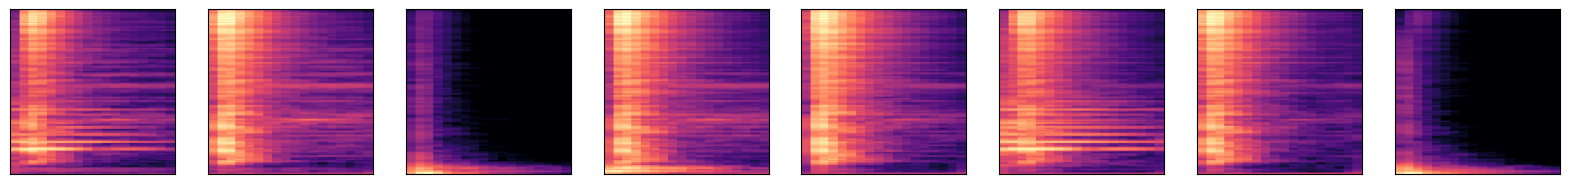

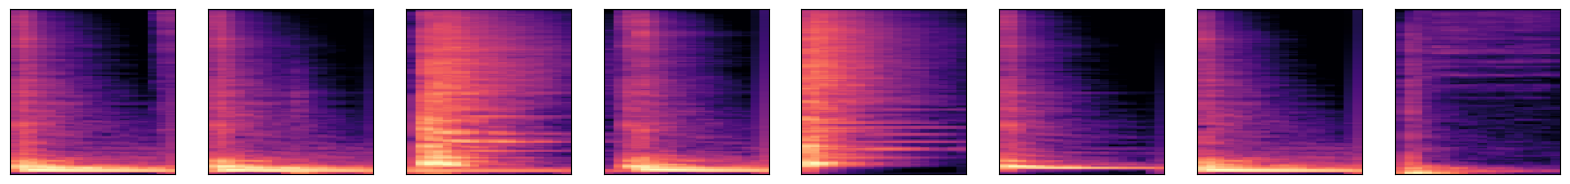

In [ ]:


def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

images, labels = load_images_from_path('/content/drive/MyDrive/Data/HH_class/HH_1_spectro', 1)
show_images(images)

x += images
y += labels

images, labels = load_images_from_path('/content/drive/MyDrive/Data/HH_class/HH_0_spectro', 0)
show_images(images)

x += images
y += labels
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.0625, random_state=42)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

print(len(x_train))
print(len(x_val))
print(len(x_test))

# Create and Evaluate Model

In [ ]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='softmax')) # num_classes is the number of output classes
    return model


model_hh = create_model()


model_hh.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model_hh.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
20/20 [==============================] - 3s 67ms/step - loss: 52.1198 - accuracy: 0.6430 - val_loss: 0.7347 - val_accuracy: 0.7143
Epoch 2/10
20/20 [==============================] - 1s 51ms/step - loss: 0.4168 - accuracy: 0.8223 - val_loss: 0.3520 - val_accuracy: 0.8333
Epoch 3/10
20/20 [==============================] - 1s 51ms/step - loss: 0.2200 - accuracy: 0.9111 - val_loss: 0.4589 - val_accuracy: 0.8333
Epoch 4/10
20/20 [==============================] - 1s 53ms/step - loss: 0.1902 - accuracy: 0.9225 - val_loss: 0.4089 - val_accuracy: 0.8571
Epoch 5/10
20/20 [==============================] - 1s 54ms/step - loss: 0.5091 - accuracy: 0.8417 - val_loss: 0.4690 - val_accuracy: 0.7619
Epoch 6/10
20/20 [==============================] - 1s 58ms/step - loss: 0.2995 - accuracy: 0.8611 - val_loss: 0.3931 - val_accuracy: 0.7857
Epoch 7/10
20/20 [==============================] - 1s 55ms/step - loss: 0.2184 - accuracy: 0.9047 - val_loss: 0.5772 - val_accuracy: 0.7619
Epoch 8/10
2

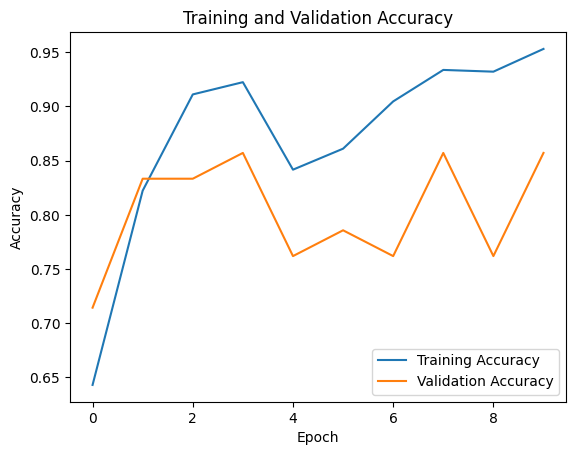

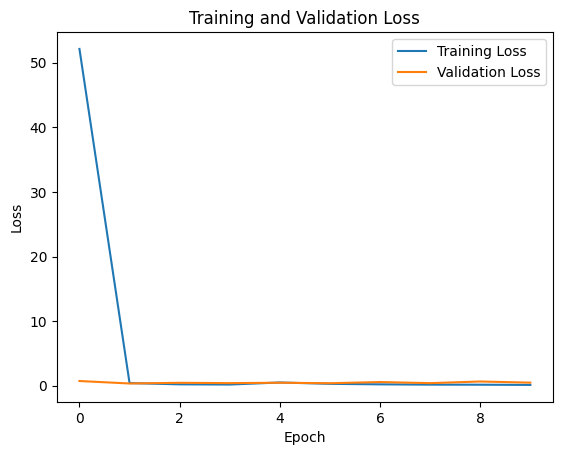

6/6 [==============================] - 0s 20ms/step - loss: 0.3305 - accuracy: 0.8855
Test accuracy: 0.8855421543121338


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


x_test = np.array(x_test)
y_test = np.array(y_test)
test_loss, test_acc = model_hh.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)



In [ ]:

predictions = model_hh.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)


true_labels = y_test


report = classification_report(true_labels, predicted_classes)


print(report)
print(true_labels)
print(predicted_classes)

6/6 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       109
           1       0.87      0.79      0.83        57

    accuracy                           0.89       166
   macro avg       0.88      0.86      0.87       166
weighted avg       0.88      0.89      0.88       166

[1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0]
[1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0

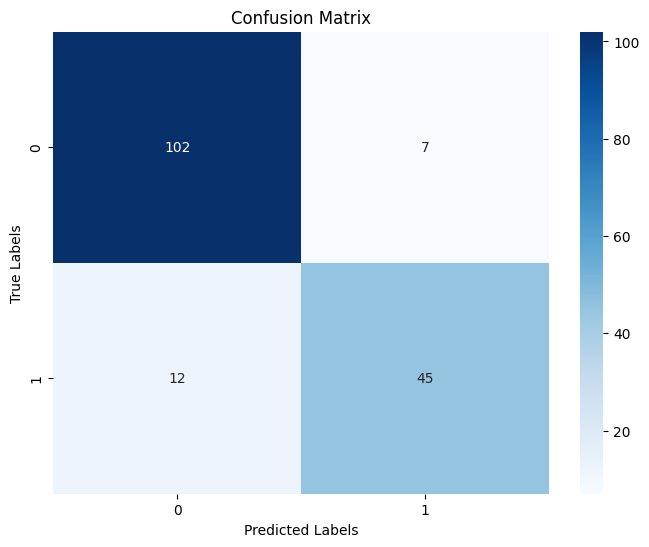

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# HH Model


In [ ]:
model_hh.save('/content/drive/MyDrive/Data/HH_model')

# Kick Model

In [ ]:
import pandas as pd

df = pd.read_csv('/content/filter.csv', header=1)

columns_to_drop = ['Unnamed: 0','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head(10)


df_kick = df[(df['Bad Audio'] == False) & (df['KD'] == True)]
df_no_kick = df[(df['Bad Audio'] == False) & (df['KD'] == False)]
print(df_kick.shape)
print(df_no_kick.shape)

kick_list = df_kick['file_name'].tolist()
print(kick_list)

no_kick_list = df_no_kick['file_name'].tolist()
print(no_kick_list)


(404, 10)
(423, 10)
['sliced_50.13', 'sliced_50.19', 'sliced_50.25', 'sliced_50.31', 'sliced_50.37', 'sliced_50.43', 'sliced_50.48', 'sliced_50.49', 'sliced_50.55', 'sliced_50.61', 'sliced_50.67', 'sliced_50.72', 'sliced_50.73', 'sliced_50.76', 'sliced_50.79', 'sliced_50.85', 'sliced_50.91', 'sliced_50.97', 'sliced_50.103', 'sliced_50.109', 'sliced_50.114', 'sliced_50.115', 'sliced_50.121', 'sliced_50.126', 'sliced_50.127', 'sliced_50.133', 'sliced_50.138', 'sliced_50.139', 'sliced_50.145', 'sliced_50.150', 'sliced_50.151', 'sliced_50.157', 'sliced_50.162', 'sliced_50.163', 'sliced_50.169', 'sliced_50.174', 'sliced_50.181', 'sliced_50.186', 'sliced_50.187', 'sliced_50.193', 'sliced_50.198', 'sliced_50.199', 'sliced_50.205', 'sliced_50.217', 'sliced_50.222', 'sliced_50.223', 'sliced_50.229', 'sliced_50.234', 'sliced_50.235', 'sliced_50.241', 'sliced_50.245', 'sliced_50.246', 'sliced_50.253', 'sliced_50.259', 'sliced_50.270', 'sliced_50.271', 'sliced_50.274', 'sliced_50.277', 'sliced_50.

In [ ]:

for i in kick_list:
  file_path = "/content/drive/MyDrive/Data/" + i +".wav"
  shutil.copy(file_path,"/content/drive/MyDrive/Data/KD_class/KD_1")

for i in no_kick_list:
  file_path = "/content/drive/MyDrive/Data/" + i +".wav"
  shutil.copy(file_path,"/content/drive/MyDrive/Data/KD_class/KD_0")

In [ ]:

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)  # Pass y and sr as keyword arguments
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    files = os.listdir(input_path)

    for file in files:
        if file.endswith('.wav'):
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.wav', '.png'))
            create_spectrogram(input_file, output_file)

create_pngs_from_wavs('/content/drive/MyDrive/Data/KD_class/KD_1', '/content/drive/MyDrive/Data/KD_class/KD_1_spectro')
create_pngs_from_wavs('/content/drive/MyDrive/Data/KD_class/KD_0', '/content/drive/MyDrive/Data/KD_class/KD_0_spectro')



Indices of x_test: [661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678
 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696
 697 698 699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714
 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732
 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750
 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768
 769 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784 785 786
 787 788 789 790 791 792 793 794 795 796 797 798 799 800 801 802 803 804
 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 821 822
 823 824 825 826]
Indices of y_test: [661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678
 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696
 697 698 699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714
 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731

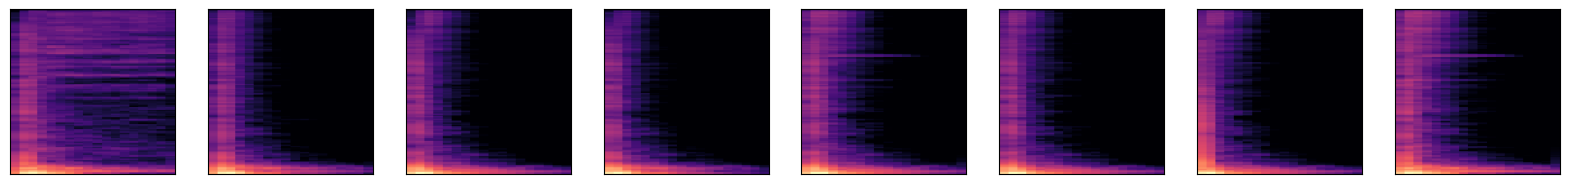

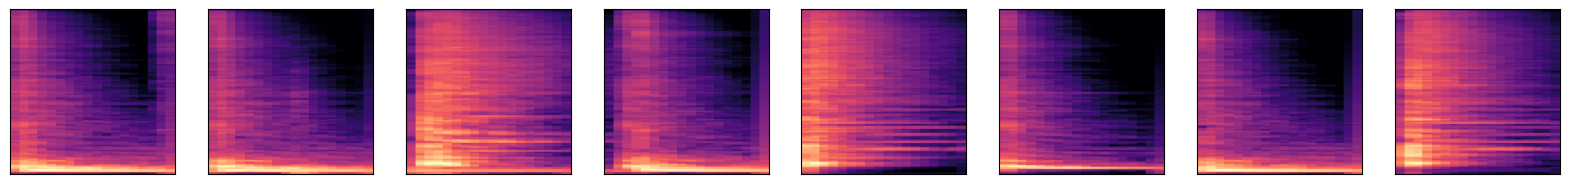

In [ ]:


def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

images, labels = load_images_from_path('/content/drive/MyDrive/Data/KD_class/KD_1_spectro', 1)
show_images(images)

x += images
y += labels

images, labels = load_images_from_path('/content/drive/MyDrive/Data/KD_class/KD_0_spectro', 0)
show_images(images)

x += images
y += labels

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.0625, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)



In [ ]:
# Assuming y_test has been defined previously

print("Actual labels of y_test:", y_test)


Actual labels of y_test: [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]


In [ ]:
print(len(x_train))
print(len(x_val))
print(len(x_test))

619
42
166


In [ ]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    return model


model_kick = create_model()


model_kick.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model_kick.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
20/20 [==============================] - 3s 66ms/step - loss: 37.5570 - accuracy: 0.6640 - val_loss: 0.3600 - val_accuracy: 0.8095
Epoch 2/20
20/20 [==============================] - 1s 51ms/step - loss: 0.2933 - accuracy: 0.8805 - val_loss: 0.2754 - val_accuracy: 0.9286
Epoch 3/20
20/20 [==============================] - 1s 50ms/step - loss: 0.3293 - accuracy: 0.8514 - val_loss: 0.3520 - val_accuracy: 0.9048
Epoch 4/20
20/20 [==============================] - 1s 51ms/step - loss: 0.2860 - accuracy: 0.8966 - val_loss: 0.2504 - val_accuracy: 0.9524
Epoch 5/20
20/20 [==============================] - 1s 51ms/step - loss: 0.2494 - accuracy: 0.9031 - val_loss: 0.2057 - val_accuracy: 0.9524
Epoch 6/20
20/20 [==============================] - 1s 51ms/step - loss: 0.2167 - accuracy: 0.9241 - val_loss: 0.2340 - val_accuracy: 0.9286
Epoch 7/20
20/20 [==============================] - 1s 53ms/step - loss: 0.1877 - accuracy: 0.9273 - val_loss: 0.2382 - val_accuracy: 0.9048
Epoch 8/20
2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

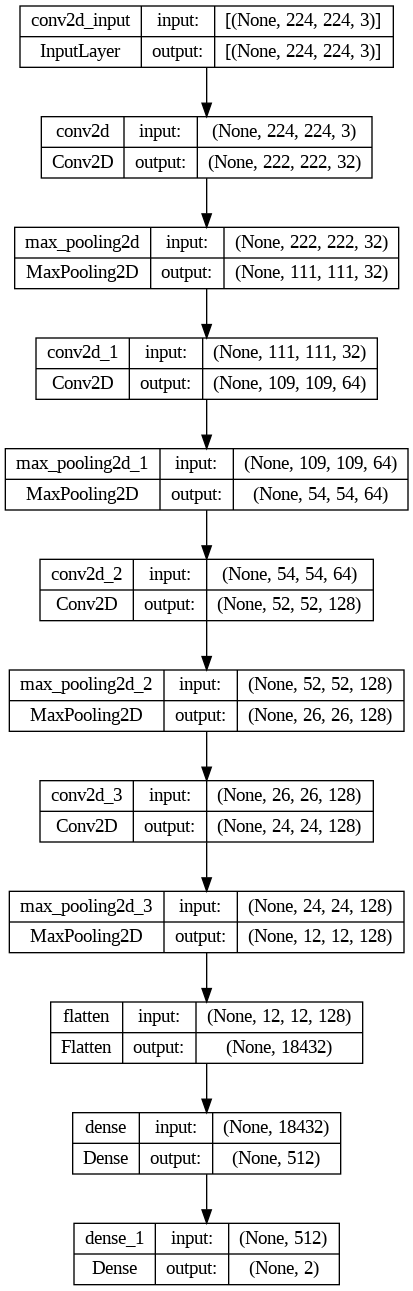

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='softmax')) # num_classes is the number of output classes
    return model

# Create the model
model_kick = create_model()

# Print the model summary
model_kick.summary()

# Visualize the model architecture
plot_model(model_kick, to_file='model.png', show_shapes=True, show_layer_names=True)


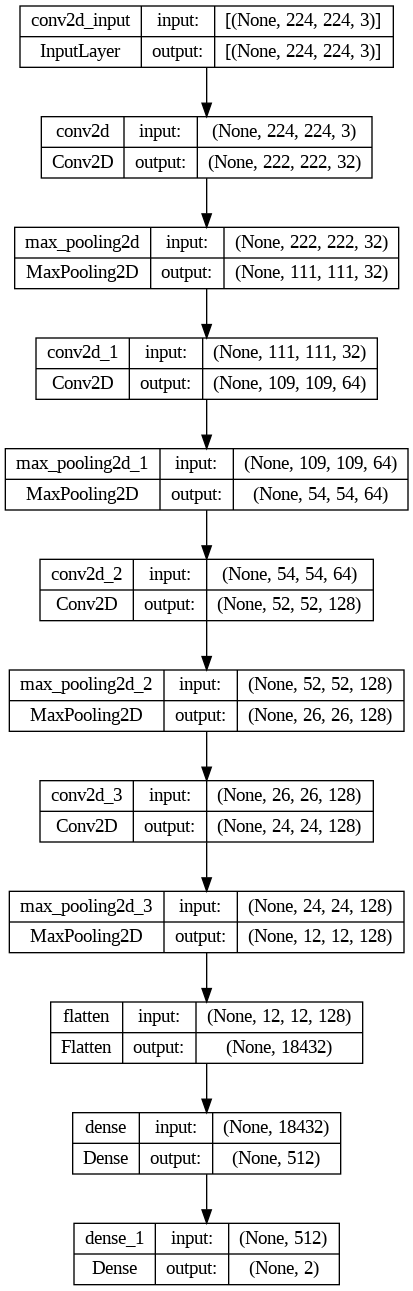

In [ ]:
from IPython.display import Image
Image('model.png')


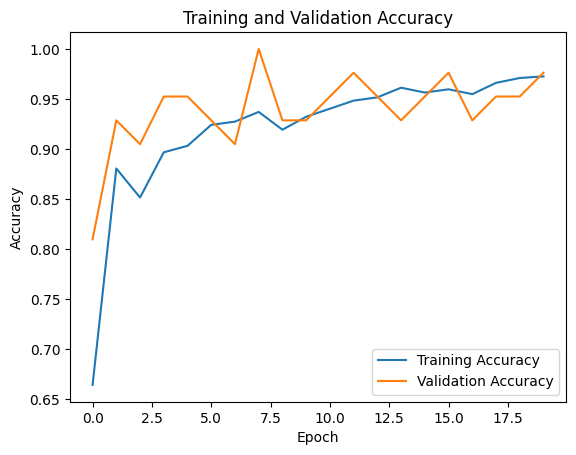

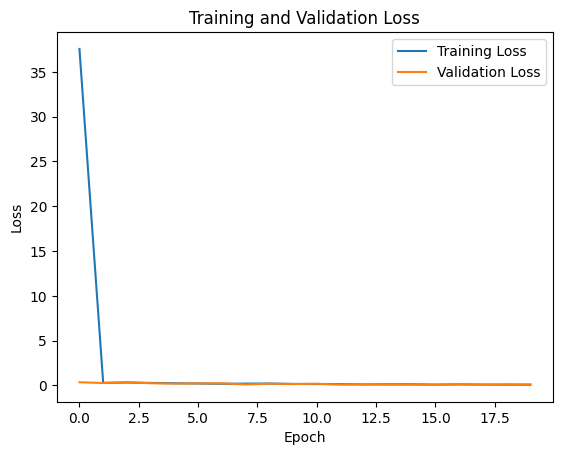

6/6 [==============================] - 0s 20ms/step - loss: 0.3637 - accuracy: 0.9277
Test accuracy: 0.9277108311653137


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


x_test = np.array(x_test)
y_test = np.array(y_test)
test_loss, test_acc = model_kick.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)



In [ ]:

predictions = model_kick.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)


true_labels = y_test


report = classification_report(true_labels, predicted_classes)


print(report)
print(true_labels)
print(predicted_classes)

6/6 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        78
           1       0.92      0.94      0.93        88

    accuracy                           0.93       166
   macro avg       0.93      0.93      0.93       166
weighted avg       0.93      0.93      0.93       166

[1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0
 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0]
[1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1
 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming predictions, x_test, y_test, and model_kick are already defined

# Get the predictions
predictions = model_kick.predict(x_test)

# Convert the predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_labels = y_test

# Generate the classification report
report = classification_report(true_labels, predicted_classes)
print(report)

# Identify misclassified instances
misclassified_indices = np.where(predicted_classes != true_labels)[0]

# Print misclassified indices and their corresponding true and predicted labels
for idx in misclassified_indices:
    print(f"Index: {idx}, True Label: {true_labels[idx]}, Predicted Label: {predicted_classes[idx]}")


6/6 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        78
           1       0.92      0.94      0.93        88

    accuracy                           0.93       166
   macro avg       0.93      0.93      0.93       166
weighted avg       0.93      0.93      0.93       166

Index: 9, True Label: 0, Predicted Label: 1
Index: 37, True Label: 1, Predicted Label: 0
Index: 52, True Label: 0, Predicted Label: 1
Index: 56, True Label: 0, Predicted Label: 1
Index: 73, True Label: 0, Predicted Label: 1
Index: 76, True Label: 1, Predicted Label: 0
Index: 81, True Label: 0, Predicted Label: 1
Index: 92, True Label: 1, Predicted Label: 0
Index: 99, True Label: 0, Predicted Label: 1
Index: 106, True Label: 0, Predicted Label: 1
Index: 154, True Label: 1, Predicted Label: 0
Index: 157, True Label: 1, Predicted Label: 0


In [ ]:
print(x_test[9])
print(y_test[9])

[[[ 22.  14.  58.]
  [ 24.  15.  62.]
  [ 24.  15.  62.]
  ...
  [  9.   7.  32.]
  [  9.   7.  32.]
  [  9.   7.  32.]]

 [[ 24.  15.  62.]
  [ 26.  16.  66.]
  [ 26.  16.  66.]
  ...
  [ 10.   8.  34.]
  [ 10.   8.  34.]
  [ 10.   8.  34.]]

 [[101.  27. 121.]
  [107.  29. 129.]
  [107.  29. 129.]
  ...
  [ 52.  16. 105.]
  [ 52.  16. 105.]
  [ 52.  16. 105.]]

 ...

 [[ 86.  20. 120.]
  [ 92.  22. 127.]
  [ 92.  22. 127.]
  ...
  [ 39.  18.  88.]
  [ 39.  18.  88.]
  [ 39.  18.  88.]]

 [[ 38.  16.  85.]
  [ 41.  17.  90.]
  [ 41.  17.  90.]
  ...
  [ 25.  16.  63.]
  [ 25.  16.  63.]
  [ 25.  16.  63.]]

 [[ 38.  16.  85.]
  [ 41.  17.  90.]
  [ 41.  17.  90.]
  ...
  [ 25.  16.  63.]
  [ 25.  16.  63.]
  [ 25.  16.  63.]]]
0


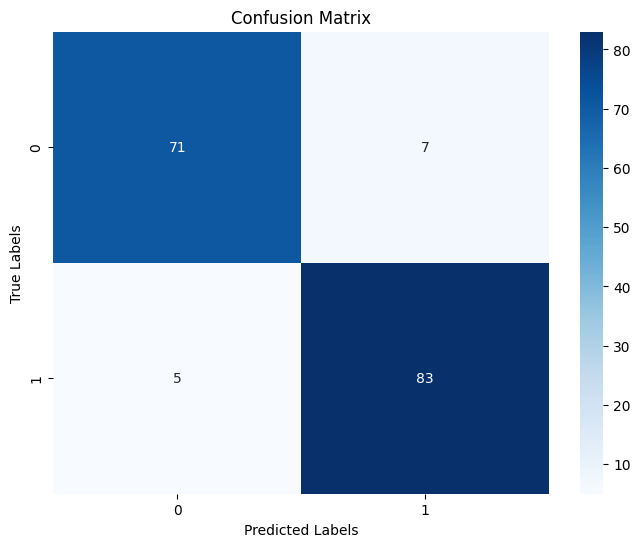

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(x[670])
print(y[670])

[[[163.  48. 107.]
  [173.  51. 114.]
  [173.  51. 114.]
  ...
  [124.  35. 121.]
  [124.  35. 121.]
  [124.  35. 121.]]

 [[173.  51. 114.]
  [184.  55. 121.]
  [184.  55. 121.]
  ...
  [132.  38. 129.]
  [132.  38. 129.]
  [132.  38. 129.]]

 [[223.  83.  90.]
  [236.  88.  96.]
  [236.  88.  96.]
  ...
  [205.  64. 113.]
  [205.  64. 113.]
  [205.  64. 113.]]

 ...

 [[240. 159. 108.]
  [254. 169. 115.]
  [254. 169. 115.]
  ...
  [ 61.  15. 113.]
  [ 61.  15. 113.]
  [ 61.  15. 113.]]

 [[196.  61. 104.]
  [208.  65. 111.]
  [208.  65. 111.]
  ...
  [ 29.  17.  71.]
  [ 29.  17.  71.]
  [ 29.  17.  71.]]

 [[196.  61. 104.]
  [208.  65. 111.]
  [208.  65. 111.]
  ...
  [ 29.  17.  71.]
  [ 29.  17.  71.]
  [ 29.  17.  71.]]]
0


In [ ]:
model_kick.save('/content/drive/MyDrive/Data/KD_model')

# SD Model

In [ ]:
import pandas as pd



df = pd.read_csv('/content/filter.csv', header=1)


columns_to_drop = ['Unnamed: 0','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head(10)


df_snare = df[(df['Bad Audio'] == False) & (df['SD'] == True)]
df_no_snare = df[(df['Bad Audio'] == False) & (df['SD'] == False)]
print(df_snare.shape)
print(df_no_snare.shape)

snare_list = df_snare['file_name'].tolist()
print(snare_list)

no_snare_list = df_no_snare['file_name'].tolist()
print(no_snare_list)


(321, 10)
(506, 10)
['sliced_51.3', 'sliced_50.10', 'sliced_50.16', 'sliced_50.22', 'sliced_50.28', 'sliced_50.34', 'sliced_50.40', 'sliced_50.46', 'sliced_50.52', 'sliced_50.58', 'sliced_50.64', 'sliced_50.70', 'sliced_50.88', 'sliced_50.94', 'sliced_50.100', 'sliced_50.106', 'sliced_50.112', 'sliced_50.118', 'sliced_50.124', 'sliced_50.130', 'sliced_50.136', 'sliced_50.142', 'sliced_50.148', 'sliced_50.154', 'sliced_50.160', 'sliced_50.166', 'sliced_50.172', 'sliced_50.178', 'sliced_50.184', 'sliced_50.190', 'sliced_50.196', 'sliced_50.202', 'sliced_50.214', 'sliced_50.220', 'sliced_50.232', 'sliced_50.238', 'sliced_50.244', 'sliced_50.256', 'sliced_50.262', 'sliced_50.264', 'sliced_50.265', 'sliced_50.268', 'sliced_50.280', 'sliced_50.286', 'sliced_50.292', 'sliced_50.304', 'sliced_50.310', 'sliced_50.316', 'sliced_50.320', 'sliced_50.328', 'sliced_50.334', 'sliced_50.340', 'sliced_50.344', 'sliced_50.346', 'sliced_50.352', 'sliced_50.358', 'sliced_50.376', 'sliced_50.382', 'sliced_

In [ ]:

for i in snare_list:
  file_path = "/content/drive/MyDrive/Data/" + i +".wav"
  shutil.copy(file_path,"/content/drive/MyDrive/Data/SD_class/SD_1")

for i in no_snare_list:
  file_path = "/content/drive/MyDrive/Data/" + i +".wav"
  shutil.copy(file_path,"/content/drive/MyDrive/Data/SD_class/SD_0")

In [ ]:

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)  # Pass y and sr as keyword arguments
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    files = os.listdir(input_path)

    for file in files:
        if file.endswith('.wav'):
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.wav', '.png'))
            create_spectrogram(input_file, output_file)

create_pngs_from_wavs('/content/drive/MyDrive/Data/SD_class/SD_1', '/content/drive/MyDrive/Data/SD_class/SD_1_spectro')
create_pngs_from_wavs('/content/drive/MyDrive/Data/SD_class/SD_0', '/content/drive/MyDrive/Data/SD_class/SD_0_spectro')



619
42
166


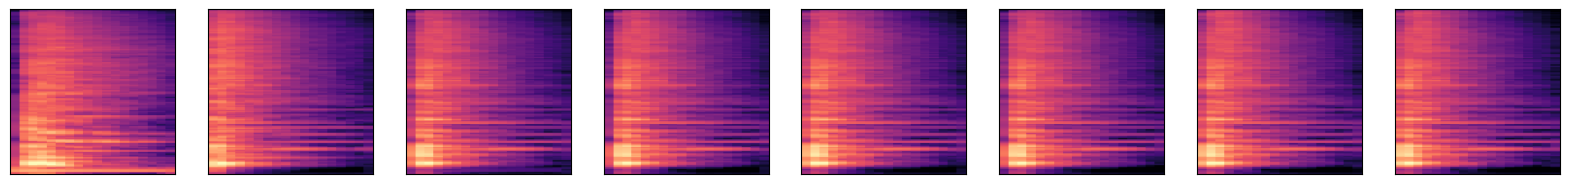

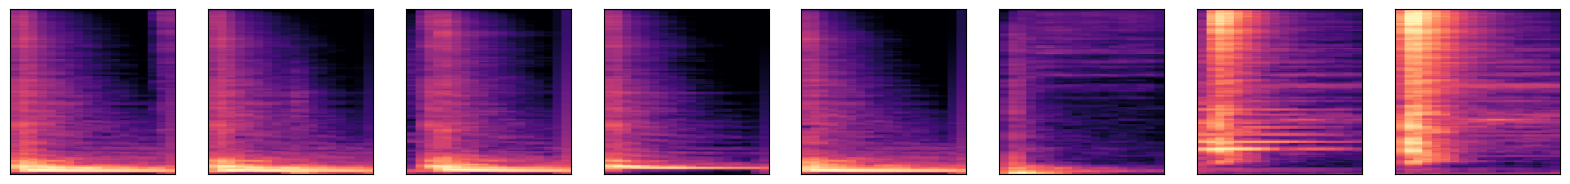

In [ ]:


def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

images, labels = load_images_from_path('/content/drive/MyDrive/Data/SD_class/SD_1_spectro', 1)
show_images(images)

x += images
y += labels

images, labels = load_images_from_path('/content/drive/MyDrive/Data/SD_class/SD_0_spectro', 0)
show_images(images)

x += images
y += labels


x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.0625, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

print(len(x_train))
print(len(x_val))
print(len(x_test))

In [ ]:

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='softmax')) # num_classes is the number of output classes
    return model


model_snare = create_model()


model_snare.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model_snare.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/15
20/20 [==============================] - 3s 66ms/step - loss: 42.4647 - accuracy: 0.6220 - val_loss: 0.9508 - val_accuracy: 0.5476
Epoch 2/15
20/20 [==============================] - 1s 51ms/step - loss: 0.3380 - accuracy: 0.8514 - val_loss: 0.3539 - val_accuracy: 0.8810
Epoch 3/15
20/20 [==============================] - 1s 51ms/step - loss: 0.1900 - accuracy: 0.9273 - val_loss: 0.2744 - val_accuracy: 0.9286
Epoch 4/15
20/20 [==============================] - 1s 52ms/step - loss: 0.1345 - accuracy: 0.9596 - val_loss: 0.2243 - val_accuracy: 0.9524
Epoch 5/15
20/20 [==============================] - 1s 55ms/step - loss: 0.0944 - accuracy: 0.9822 - val_loss: 0.2252 - val_accuracy: 0.9286
Epoch 6/15
20/20 [==============================] - 1s 58ms/step - loss: 0.0897 - accuracy: 0.9806 - val_loss: 0.2245 - val_accuracy: 0.9762
Epoch 7/15
20/20 [==============================] - 1s 58ms/step - loss: 0.0671 - accuracy: 0.9871 - val_loss: 0.2063 - val_accuracy: 0.9762
Epoch 8/15
2

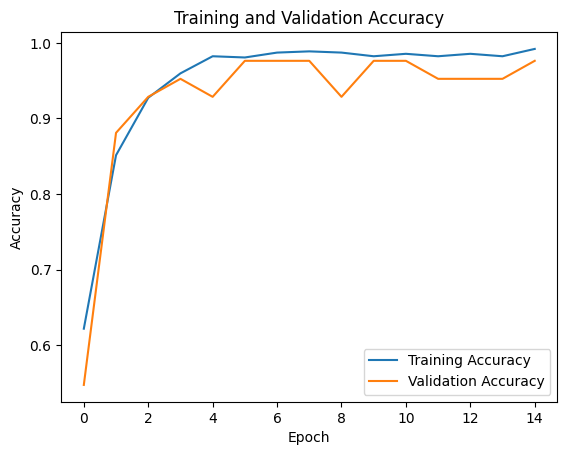

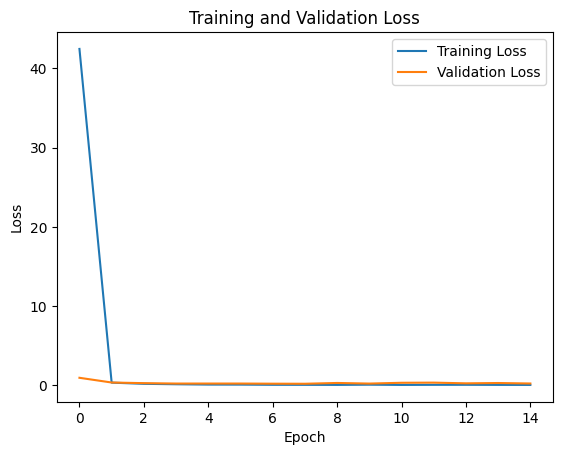

6/6 [==============================] - 0s 19ms/step - loss: 0.0904 - accuracy: 0.9880
Test accuracy: 0.9879518151283264


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


x_test = np.array(x_test)
y_test = np.array(y_test)
test_loss, test_acc = model_snare.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)



In [ ]:

predictions = model_snare.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)


true_labels = y_test


report = classification_report(true_labels, predicted_classes)


print(report)
print(true_labels)
print(predicted_classes)

6/6 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        98
           1       1.00      0.97      0.99        68

    accuracy                           0.99       166
   macro avg       0.99      0.99      0.99       166
weighted avg       0.99      0.99      0.99       166

[1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0]
[1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1

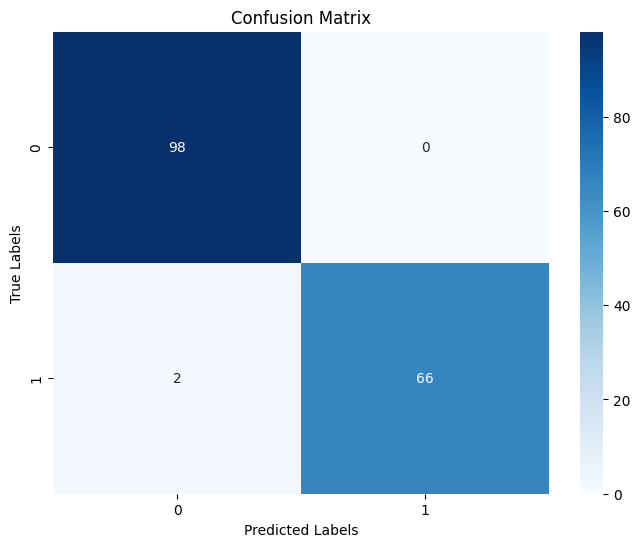

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model_snare.save('/content/drive/MyDrive/Data/SD_model')

# Tom Model

In [ ]:
import pandas as pd



df = pd.read_csv('/content/filter.csv', header=1)


columns_to_drop = ['Unnamed: 0','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head(10)


df_tom = df[(df['Bad Audio'] == False) & (df['Tom'] == True)]
df_no_tom = df[(df['Bad Audio'] == False) & (df['Tom'] == False)]
print(df_tom.shape)
print(df_no_tom.shape)

tom_list = df_tom['file_name'].tolist()
print(tom_list)

no_tom_list = df_no_tom['file_name'].tolist()
print(no_tom_list)


(117, 10)
(710, 10)
['sliced_51.1', 'sliced_51.2', 'sliced_51.4', 'sliced_50.11', 'sliced_50.12', 'sliced_50.155', 'sliced_50.156', 'sliced_50.211', 'sliced_50.299', 'sliced_50.300', 'sliced_28.150', 'sliced_28.151', 'sliced_28.240', 'sliced_28.242', 'sliced_28.243', 'sliced_28.245', 'sliced_28.256', 'sliced_28.258', 'sliced_28.264', 'sliced_28.266', 'sliced_28.272', 'sliced_28.274', 'sliced_28.303', 'sliced_28.335', 'sliced_28.430', 'sliced_28.431', 'sliced_28.432', 'sliced_28.527', 'sliced_28.629', 'sliced_28.645', 'sliced_28.673', 'sliced_28.689', 'sliced_28.705', 'sliced_28.715', 'sliced_28.717', 'sliced_28.719', 'sliced_28.783', 'sliced_data2.8', 'sliced_data2.9', 'sliced_data2.10', 'sliced_data2.11', 'sliced_data2.12', 'sliced_data2.13', 'sliced_data2.14', 'sliced_data2.15', 'sliced_data2.19', 'sliced_data2.21', 'sliced_data2.22', 'sliced_data2.23', 'sliced_data2.27', 'sliced_data2.29', 'sliced_data2.30', 'sliced_data2.31', 'sliced_data2.44', 'sliced_data2.45', 'sliced_data2.46',

In [ ]:

for i in tom_list:
  file_path = "/content/drive/MyDrive/Data/" + i +".wav"
  shutil.copy(file_path,"/content/drive/MyDrive/Data/Tom_class/Tom_1")

for i in no_tom_list:
  file_path = "/content/drive/MyDrive/Data/" + i +".wav"
  shutil.copy(file_path,"/content/drive/MyDrive/Data/Tom_class/Tom_0")

In [ ]:

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)  # Pass y and sr as keyword arguments
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    files = os.listdir(input_path)

    for file in files:
        if file.endswith('.wav'):
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.wav', '.png'))
            create_spectrogram(input_file, output_file)

create_pngs_from_wavs('/content/drive/MyDrive/Data/Tom_class/Tom_1', '/content/drive/MyDrive/Data/Tom_class/Tom_1_spectro')
create_pngs_from_wavs('/content/drive/MyDrive/Data/Tom_class/Tom_0', '/content/drive/MyDrive/Data/Tom_class/Tom_0_spectro')



619
42
166


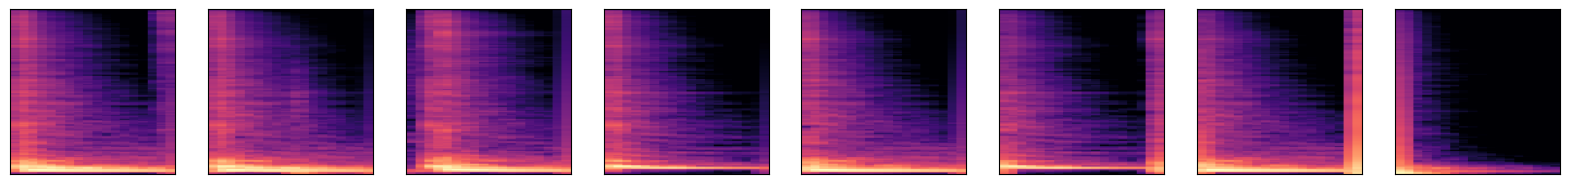

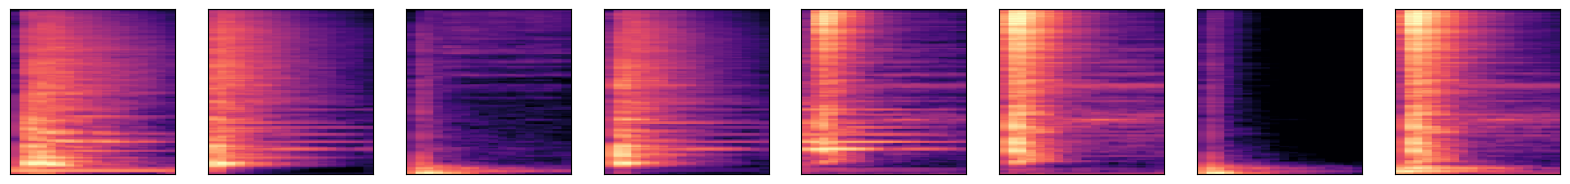

In [ ]:


def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

images, labels = load_images_from_path('/content/drive/MyDrive/Data/Tom_class/Tom_1_spectro', 1)
show_images(images)

x += images
y += labels

images, labels = load_images_from_path('/content/drive/MyDrive/Data/Tom_class/Tom_0_spectro', 0)
show_images(images)

x += images
y += labels
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.0625, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

print(len(x_train))
print(len(x_val))
print(len(x_test))

In [ ]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='softmax')) # num_classes is the number of output classes
    return model


model_tom = create_model()


model_tom.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model_tom.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/15
20/20 [==============================] - 5s 64ms/step - loss: 25.6407 - accuracy: 0.7157 - val_loss: 0.2694 - val_accuracy: 0.9286
Epoch 2/15
20/20 [==============================] - 1s 53ms/step - loss: 0.2313 - accuracy: 0.9257 - val_loss: 0.1155 - val_accuracy: 0.9286
Epoch 3/15
20/20 [==============================] - 1s 50ms/step - loss: 0.1838 - accuracy: 0.9467 - val_loss: 0.2870 - val_accuracy: 0.9286
Epoch 4/15
20/20 [==============================] - 1s 52ms/step - loss: 0.1351 - accuracy: 0.9580 - val_loss: 0.1549 - val_accuracy: 0.9524
Epoch 5/15
20/20 [==============================] - 1s 50ms/step - loss: 0.0854 - accuracy: 0.9677 - val_loss: 0.1802 - val_accuracy: 0.9762
Epoch 6/15
20/20 [==============================] - 1s 50ms/step - loss: 0.0724 - accuracy: 0.9742 - val_loss: 0.0939 - val_accuracy: 0.9762
Epoch 7/15
20/20 [==============================] - 1s 51ms/step - loss: 0.0421 - accuracy: 0.9822 - val_loss: 0.1234 - val_accuracy: 0.9762
Epoch 8/15
2

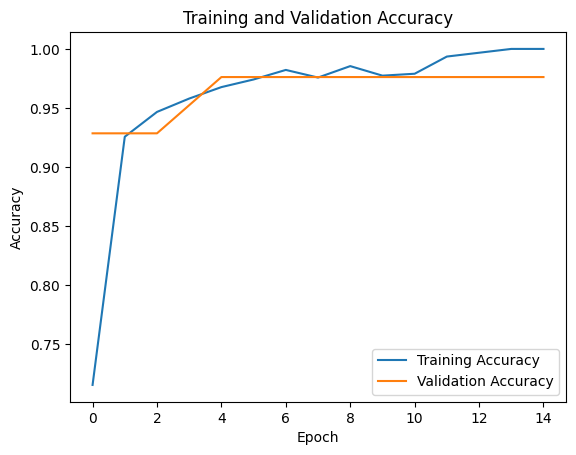

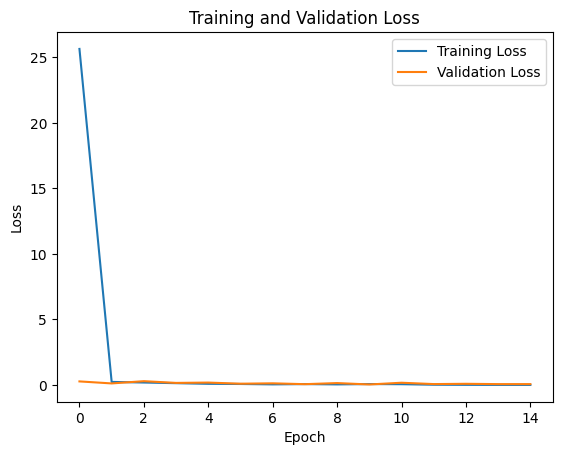

6/6 [==============================] - 0s 19ms/step - loss: 0.1169 - accuracy: 0.9759
Test accuracy: 0.9759036302566528


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


x_test = np.array(x_test)
y_test = np.array(y_test)
test_loss, test_acc = model_tom.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)



In [ ]:

predictions = model_tom.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)


true_labels = y_test


report = classification_report(true_labels, predicted_classes)


print(report)
print(true_labels)
print(predicted_classes)

6/6 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       138
           1       0.96      0.89      0.93        28

    accuracy                           0.98       166
   macro avg       0.97      0.94      0.96       166
weighted avg       0.98      0.98      0.98       166

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0

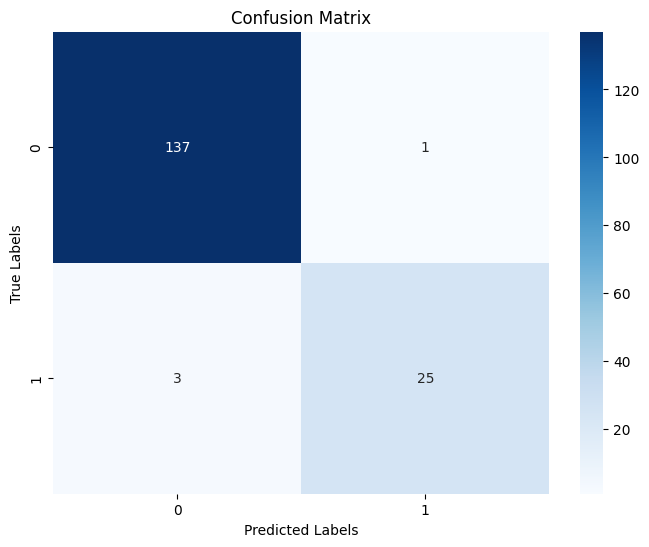

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model_tom.save('/content/drive/MyDrive/Data/Tom_model')

# Crash Model

In [ ]:
import pandas as pd



df = pd.read_csv('/content/filter.csv', header=1)


columns_to_drop = ['Unnamed: 0','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head(10)


df_crash = df[(df['Bad Audio'] == False) & (df['Crash'] == True)]
df_no_crash = df[(df['Bad Audio'] == False) & (df['Crash'] == False)]
print(df_crash.shape)
print(df_no_crash.shape)

crash_list = df_crash['file_name'].tolist()
print(crash_list)

no_crash_list = df_no_crash['file_name'].tolist()
print(no_crash_list)


(92, 10)
(735, 10)
['sliced_50.13', 'sliced_50.157', 'sliced_50.205', 'sliced_50.253', 'sliced_50.301', 'sliced_50.373', 'sliced_50.375', 'sliced_50.376', 'sliced_50.377', 'sliced_50.378', 'sliced_50.382', 'sliced_50.384', 'sliced_50.388', 'sliced_50.390', 'sliced_50.394', 'sliced_50.400', 'sliced_50.406', 'sliced_50.433', 'sliced_50.457', 'sliced_50.481', 'sliced_50.484', 'sliced_50.490', 'sliced_50.505', 'sliced_50.508', 'sliced_50.510', 'sliced_50.529', 'sliced_50.532', 'sliced_50.534', 'sliced_50.538', 'sliced_50.553', 'sliced_28.305', 'sliced_28.337', 'sliced_28.401', 'sliced_28.402', 'sliced_28.433', 'sliced_28.434', 'sliced_28.435', 'sliced_28.442', 'sliced_28.465', 'sliced_28.529', 'sliced_28.531', 'sliced_28.561', 'sliced_28.593', 'sliced_28.625', 'sliced_28.626', 'sliced_28.639', 'sliced_28.641', 'sliced_28.657', 'sliced_28.689', 'sliced_28.721', 'sliced_28.753', 'sliced_28.755', 'sliced_data2.24', 'sliced_data2.25', 'sliced_data2.26', 'sliced_data2.27', 'sliced_data2.28', 's

In [ ]:

for i in crash_list:
  file_path = "/content/drive/MyDrive/Data/" + i +".wav"
  shutil.copy(file_path,"/content/drive/MyDrive/Data/Crash_class/Crash_1")

for i in no_crash_list:
  file_path = "/content/drive/MyDrive/Data/" + i +".wav"
  shutil.copy(file_path,"/content/drive/MyDrive/Data/Crash_class/Crash_0")

In [ ]:

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)  # Pass y and sr as keyword arguments
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    files = os.listdir(input_path)

    for file in files:
        if file.endswith('.wav'):
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.wav', '.png'))
            create_spectrogram(input_file, output_file)

create_pngs_from_wavs('/content/drive/MyDrive/Data/Crash_class/Crash_1', '/content/drive/MyDrive/Data/Crash_class/Crash_1_spectro')
create_pngs_from_wavs('/content/drive/MyDrive/Data/Crash_class/Crash_0', '/content/drive/MyDrive/Data/Crash_class/Crash_0_spectro')



619
42
166


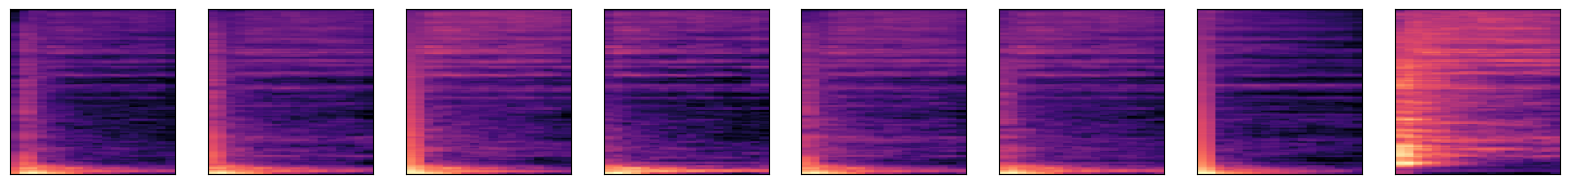

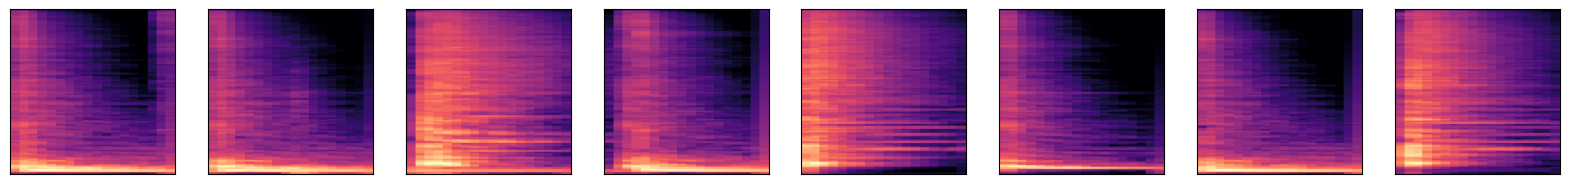

In [ ]:


def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

images, labels = load_images_from_path('/content/drive/MyDrive/Data/Crash_class/Crash_1_spectro', 1)
show_images(images)

x += images
y += labels

images, labels = load_images_from_path('/content/drive/MyDrive/Data/Crash_class/Crash_0_spectro', 0)
show_images(images)

x += images
y += labels
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.0625, random_state=42)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

print(len(x_train))
print(len(x_val))
print(len(x_test))

In [ ]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='softmax')) # num_classes is the number of output classes
    return model


model_crash = create_model()


model_crash.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model_crash.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/15
20/20 [==============================] - 78s 4s/step - loss: 14.6688 - accuracy: 0.7754 - val_loss: 1.0803 - val_accuracy: 0.8333
Epoch 2/15
20/20 [==============================] - 73s 4s/step - loss: 0.3438 - accuracy: 0.8498 - val_loss: 0.3135 - val_accuracy: 0.8333
Epoch 3/15
20/20 [==============================] - 72s 4s/step - loss: 0.1747 - accuracy: 0.9128 - val_loss: 0.2038 - val_accuracy: 0.9048
Epoch 4/15
20/20 [==============================] - 72s 4s/step - loss: 0.1440 - accuracy: 0.9321 - val_loss: 0.1568 - val_accuracy: 0.9762
Epoch 5/15
20/20 [==============================] - 73s 4s/step - loss: 0.0989 - accuracy: 0.9612 - val_loss: 0.1025 - val_accuracy: 0.9524
Epoch 6/15
20/20 [==============================] - 71s 4s/step - loss: 0.1393 - accuracy: 0.9532 - val_loss: 0.1743 - val_accuracy: 0.9286
Epoch 7/15
20/20 [==============================] - 71s 4s/step - loss: 0.1051 - accuracy: 0.9564 - val_loss: 0.1218 - val_accuracy: 0.9762
Epoch 8/15
20/20 [=

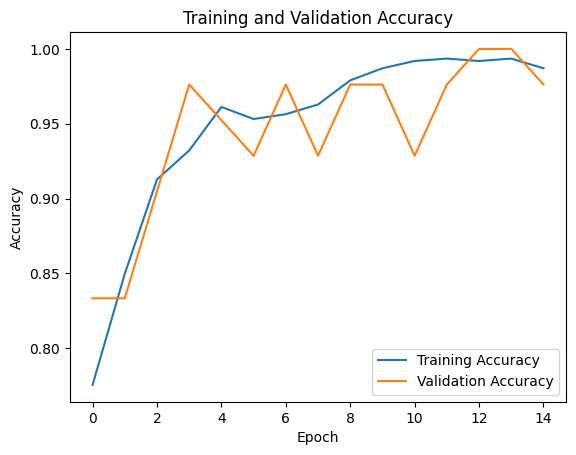

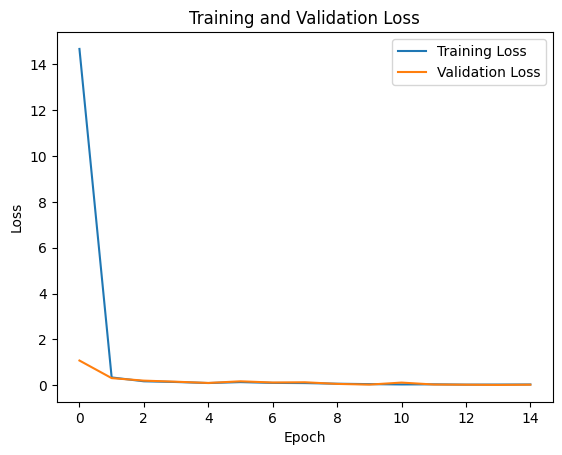

6/6 [==============================] - 6s 901ms/step - loss: 0.0224 - accuracy: 0.9940
Test accuracy: 0.9939758777618408


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


x_test = np.array(x_test)
y_test = np.array(y_test)
test_loss, test_acc = model_crash.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)



In [ ]:

predictions = model_crash.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)


true_labels = y_test


report = classification_report(true_labels, predicted_classes)


print(report)
print(true_labels)
print(predicted_classes)

6/6 [==============================] - 7s 919ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.96      0.98        23

    accuracy                           0.99       166
   macro avg       1.00      0.98      0.99       166
weighted avg       0.99      0.99      0.99       166

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 

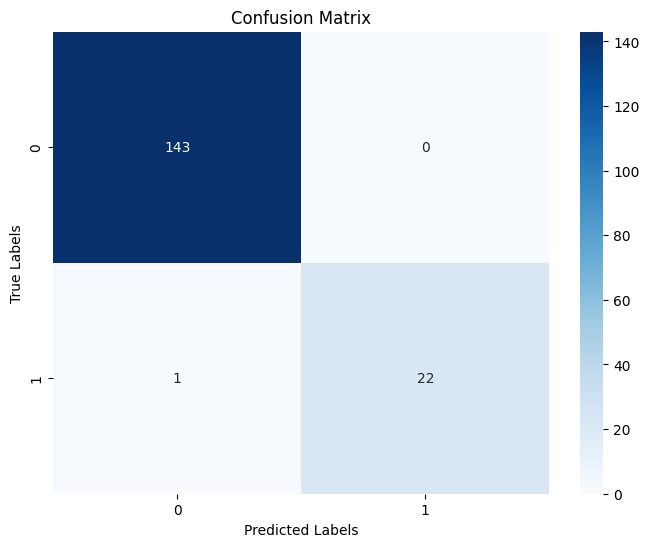

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model_crash.save('/content/drive/MyDrive/Data/Crash_model')

# Prediction

In [ ]:
def slice_and_display_audio(file_path, start_time):
    audio_data, sampling_rate = librosa.load(file_path, sr=None)
    segment_duration = 30/100
    num_segments = int(len(audio_data) / sampling_rate / segment_duration)
    for i in range(num_segments):
        segment_start = i * segment_duration
        segment_end = segment_start + segment_duration
        segment_start_sample = int(segment_start * sampling_rate)
        segment_end_sample = int(segment_end * sampling_rate)
        segment_data = audio_data[segment_start_sample:segment_end_sample]
        print(f"Segment {i+1}: {segment_start} s - {segment_end} s")
        display(ipd.Audio(segment_data, rate=sampling_rate))

start_time = 0

file_path = "/content/test1.wav"

slice_and_display_audio(file_path, start_time)

Segment 1: 0.0 s - 0.3 s


Segment 2: 0.3 s - 0.6 s


Segment 3: 0.6 s - 0.8999999999999999 s


Segment 4: 0.8999999999999999 s - 1.2 s


Segment 5: 1.2 s - 1.5 s


Segment 6: 1.5 s - 1.8 s


Segment 7: 1.7999999999999998 s - 2.0999999999999996 s


Segment 8: 2.1 s - 2.4 s


Segment 9: 2.4 s - 2.6999999999999997 s


Segment 10: 2.6999999999999997 s - 2.9999999999999996 s


Segment 11: 3.0 s - 3.3 s


Segment 12: 3.3 s - 3.5999999999999996 s


Segment 13: 3.5999999999999996 s - 3.8999999999999995 s


Segment 14: 3.9 s - 4.2 s


Segment 15: 4.2 s - 4.5 s


Segment 16: 4.5 s - 4.8 s


Segment 17: 4.8 s - 5.1 s


Segment 18: 5.1 s - 5.3999999999999995 s


Segment 19: 5.3999999999999995 s - 5.699999999999999 s


Segment 20: 5.7 s - 6.0 s


Segment 21: 6.0 s - 6.3 s


Segment 22: 6.3 s - 6.6 s


Segment 23: 6.6 s - 6.8999999999999995 s


Segment 24: 6.8999999999999995 s - 7.199999999999999 s


Segment 25: 7.199999999999999 s - 7.499999999999999 s


Segment 26: 7.5 s - 7.8 s


Segment 27: 7.8 s - 8.1 s


Segment 28: 8.1 s - 8.4 s


Segment 29: 8.4 s - 8.700000000000001 s


Segment 30: 8.7 s - 9.0 s


Segment 31: 9.0 s - 9.3 s


Segment 32: 9.299999999999999 s - 9.6 s


Segment 33: 9.6 s - 9.9 s


Segment 34: 9.9 s - 10.200000000000001 s


Segment 35: 10.2 s - 10.5 s


Segment 36: 10.5 s - 10.8 s


Segment 37: 10.799999999999999 s - 11.1 s


Segment 38: 11.1 s - 11.4 s


Segment 39: 11.4 s - 11.700000000000001 s


Segment 40: 11.7 s - 12.0 s


Segment 41: 12.0 s - 12.3 s


In [ ]:
def slice_and_export_audio(file_path, list_file):

    audio_data, sampling_rate = sf.read(file_path)


    segment_duration = 30/100


    num_segments = int(len(audio_data) / sampling_rate / segment_duration)


    for i in list_file:
        if i <= num_segments:
            segment_start = (i - 1) * segment_duration
            segment_end = segment_start + segment_duration
            segment_start_sample = int(segment_start * sampling_rate)
            segment_end_sample = int(segment_end * sampling_rate)
            segment_data = audio_data[segment_start_sample:segment_end_sample]

            segment_file_name = f"sliced_{os.path.basename(file_path).split('.')[0]}.{i}.wav"
            segment_file_path = os.path.join("/content/drive/MyDrive/Data/test2/test2_audio", segment_file_name)
            sf.write(segment_file_path, segment_data, sampling_rate)
            print(f"Segment {i} exported as {segment_file_name}")

file_path = "/content/test2.wav"

list_file = []
i = 1
while(i<33):
  list_file.append(i)
  i = i+1

print(list_file)

slice_and_export_audio(file_path, list_file)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
Segment 1 exported as sliced_test2.1.wav
Segment 2 exported as sliced_test2.2.wav
Segment 3 exported as sliced_test2.3.wav
Segment 4 exported as sliced_test2.4.wav
Segment 5 exported as sliced_test2.5.wav
Segment 6 exported as sliced_test2.6.wav
Segment 7 exported as sliced_test2.7.wav
Segment 8 exported as sliced_test2.8.wav
Segment 9 exported as sliced_test2.9.wav
Segment 10 exported as sliced_test2.10.wav
Segment 11 exported as sliced_test2.11.wav
Segment 12 exported as sliced_test2.12.wav
Segment 13 exported as sliced_test2.13.wav
Segment 14 exported as sliced_test2.14.wav
Segment 15 exported as sliced_test2.15.wav
Segment 16 exported as sliced_test2.16.wav
Segment 17 exported as sliced_test2.17.wav
Segment 18 exported as sliced_test2.18.wav
Segment 19 exported as sliced_test2.19.wav
Segment 20 exported as sliced_test2.20.wav
Segment 21 exported as sliced_test2.21

In [ ]:

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)  # Pass y and sr as keyword arguments
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    files = os.listdir(input_path)

    for file in files:
        if file.endswith('.wav'):
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.wav', '.png'))
            create_spectrogram(input_file, output_file)

create_pngs_from_wavs('/content/drive/MyDrive/Data/test2/test2_audio', '/content/drive/MyDrive/Data/test2/test2_spec')



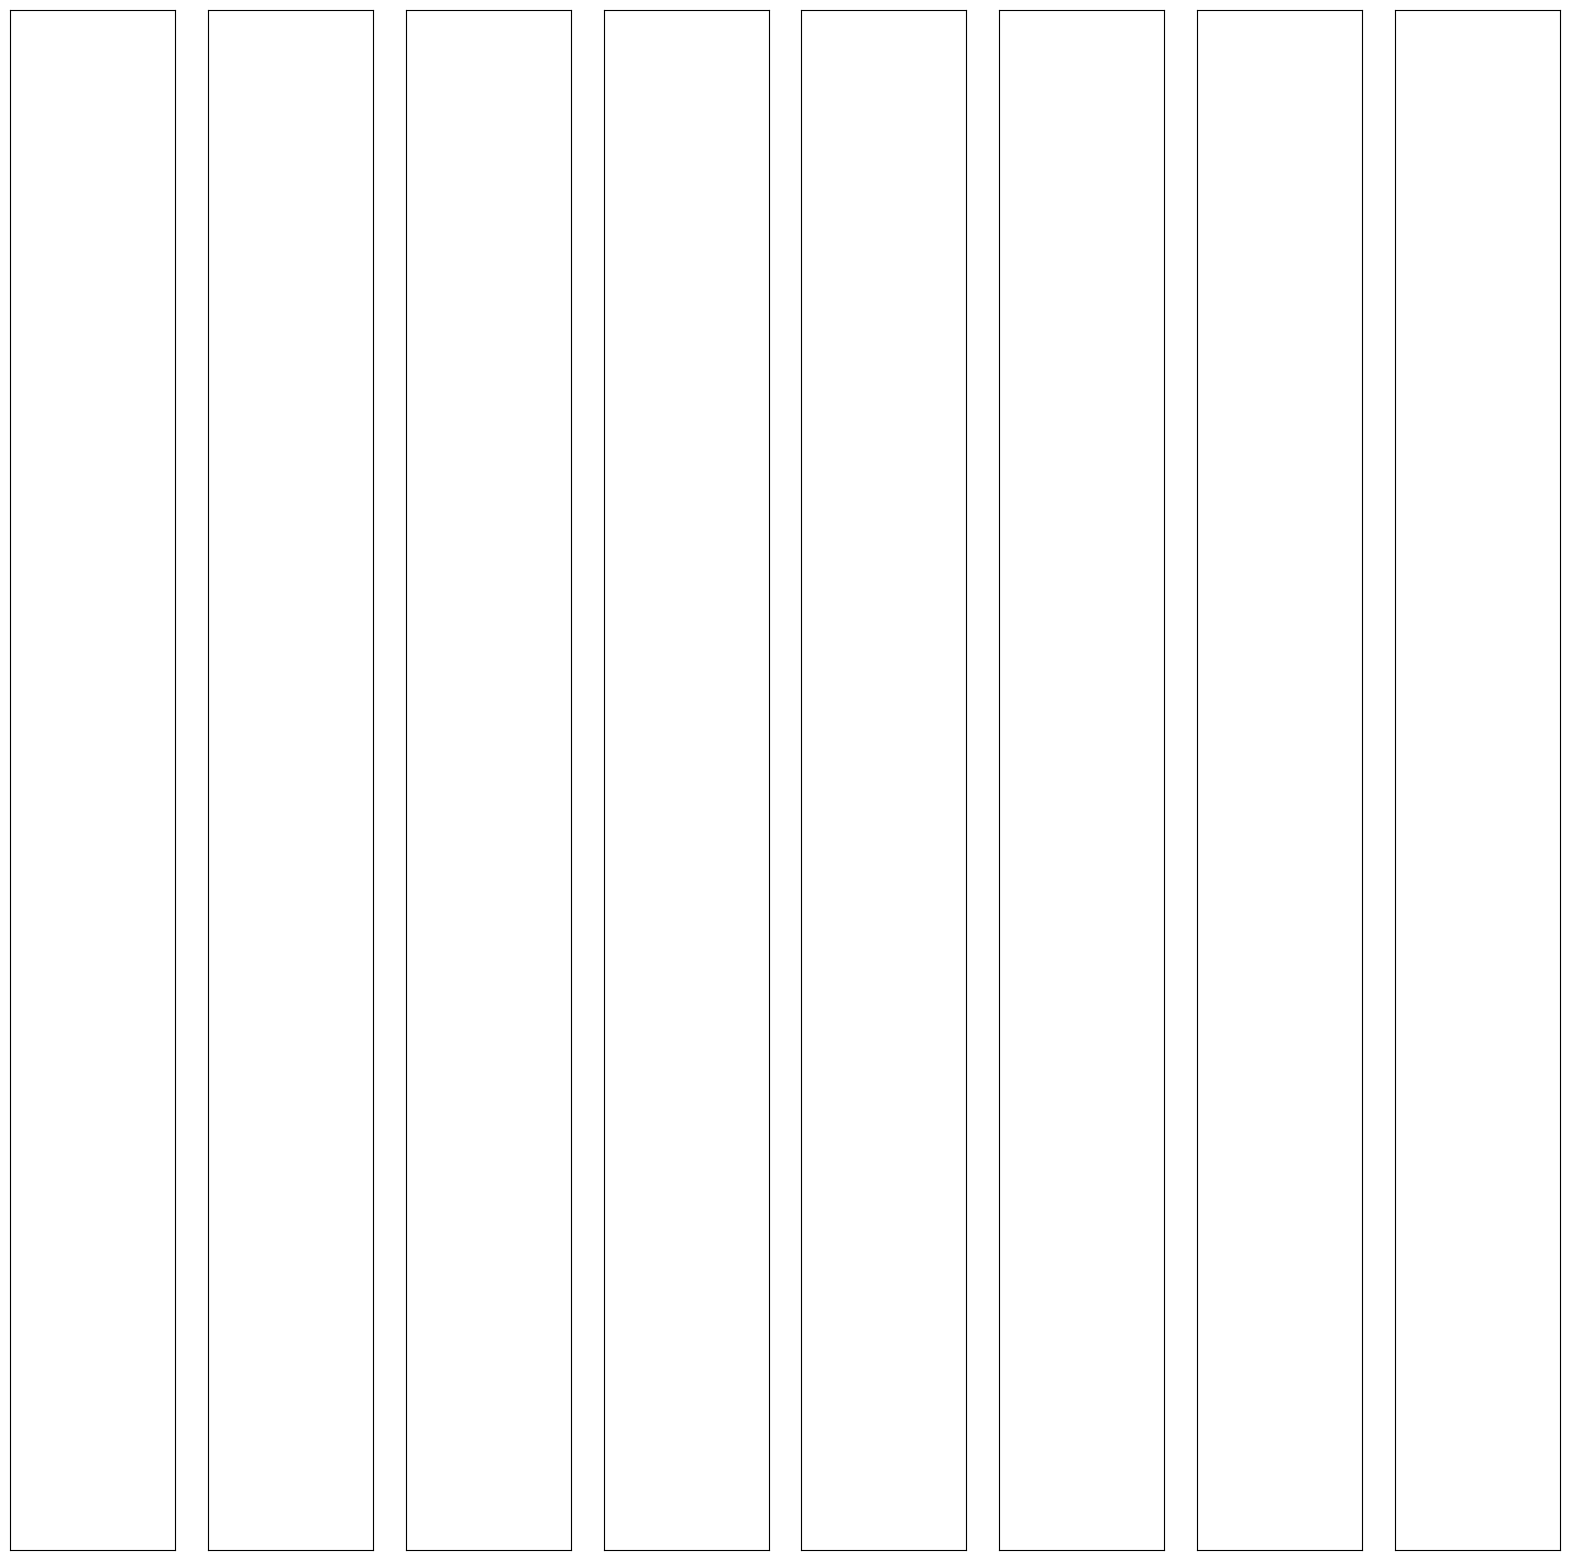

In [ ]:

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})


x_prediction = []
y_prediction = []

images, labels = load_images_from_path('/content/drive/MyDrive/Data/test2/test2_spec', 1)
show_images(images)

x_prediction += images



In [ ]:
len(x_prediction)

32

In [ ]:
x_prediction[0].shape

(224, 224, 3)

In [ ]:
 for i in range(0,len(x_prediction)):
  x_prediction[i] = np.expand_dims(x_prediction[i], axis=0)

In [ ]:
from keras.models import load_model


model_path = '/content/drive/MyDrive/Data/HH_model'
loaded_model = load_model(model_path)
hh_list=[]
for i in range(0,len(x_prediction)):
  prediction = loaded_model.predict(x_prediction[i])
  class_label = 1 if prediction[0][1] >= 0.5 else 0
  hh_list.append(class_label)
  print(prediction)

print(hh_list)





1/1 [==============================] - 0s 253ms/step
[[0.9148875  0.08511248]]
1/1 [==============================] - 0s 48ms/step
[[3.0194625e-04 9.9969804e-01]]
1/1 [==============================] - 0s 49ms/step
[[0.989449   0.01055105]]
1/1 [==============================] - 0s 54ms/step
[[2.8802504e-04 9.9971193e-01]]
1/1 [==============================] - 0s 66ms/step
[[0.9109231  0.08907691]]
1/1 [==============================] - 0s 59ms/step
[[2.9125367e-04 9.9970871e-01]]
1/1 [==============================] - 0s 48ms/step
[[0.9952348  0.00476522]]
1/1 [==============================] - 0s 46ms/step
[[0.9153709  0.08462913]]
1/1 [==============================] - 0s 50ms/step
[[0.9213613  0.07863861]]
1/1 [==============================] - 0s 47ms/step
[[6.224857e-05 9.999378e-01]]
1/1 [==============================] - 0s 46ms/step
[[0.99105656 0.00894347]]
1/1 [==============================] - 0s 46ms/step
[[9.7255164e-05 9.9990273e-01]]
1/1 [==============================

In [ ]:
from keras.models import load_model


model_snare_path = '/content/drive/MyDrive/Data/SD_model'
loaded_model = load_model(model_snare_path)
snare_list=[]
for i in range(0,len(x_prediction)):
  prediction = loaded_model.predict(x_prediction[i])
  class_label = 1 if prediction[0][1] >= 0.5 else 0
  snare_list.append(class_label)
  print(prediction)
print(snare_list)




1/1 [==============================] - 0s 112ms/step
[[0.6534127  0.34658727]]
1/1 [==============================] - 0s 47ms/step
[[0.99875414 0.00124585]]
1/1 [==============================] - 0s 46ms/step
[[0.00159518 0.9984048 ]]
1/1 [==============================] - 0s 50ms/step
[[9.9996710e-01 3.2863085e-05]]
1/1 [==============================] - 0s 50ms/step
[[0.6557883  0.34421173]]
1/1 [==============================] - 0s 66ms/step
[[0.9986424  0.00135763]]
1/1 [==============================] - 0s 53ms/step
[[0.00357846 0.9964216 ]]
1/1 [==============================] - 0s 51ms/step
[[0.61898863 0.38101137]]
1/1 [==============================] - 0s 47ms/step
[[0.68987983 0.31012014]]
1/1 [==============================] - 0s 47ms/step
[[9.9999499e-01 5.0357885e-06]]
1/1 [==============================] - 0s 49ms/step
[[0.00159812 0.99840194]]
1/1 [==============================] - 0s 46ms/step
[[9.9998045e-01 1.9590625e-05]]
1/1 [==============================] - 0s 45m

In [ ]:
from keras.models import load_model


model_kick_path = '/content/drive/MyDrive/Data/KD_model'
loaded_model = load_model(model_kick_path)
kick_list=[]
for i in range(0,len(x_prediction)):
  prediction = loaded_model.predict(x_prediction[i])
  class_label = 1 if prediction[0][1] >= 0.5 else 0
  kick_list.append(class_label)
  print(prediction)

print(kick_list)


1/1 [==============================] - 0s 112ms/step
[[0.12327517 0.8767248 ]]
1/1 [==============================] - 0s 50ms/step
[[9.9999785e-01 2.1632852e-06]]
1/1 [==============================] - 0s 51ms/step
[[0.9956049  0.00439512]]
1/1 [==============================] - 0s 53ms/step
[[9.9999964e-01 3.0862356e-07]]
1/1 [==============================] - 0s 51ms/step
[[0.12716709 0.87283295]]
1/1 [==============================] - 0s 49ms/step
[[9.9999774e-01 2.2491602e-06]]
1/1 [==============================] - 0s 48ms/step
[[9.9985945e-01 1.4054737e-04]]
1/1 [==============================] - 0s 47ms/step
[[0.14325021 0.85674983]]
1/1 [==============================] - 0s 46ms/step
[[0.11620682 0.8837932 ]]
1/1 [==============================] - 0s 63ms/step
[[9.9999905e-01 9.3683087e-07]]
1/1 [==============================] - 0s 49ms/step
[[0.9955628  0.00443716]]
1/1 [==============================] - 0s 47ms/step
[[9.9999905e-01 9.2584935e-07]]
1/1 [======================

In [ ]:
from keras.models import load_model


model_tom_path = '/content/drive/MyDrive/Data/Tom_model'
loaded_model = load_model(model_tom_path)
tom_list=[]
for i in range(0,len(x_prediction)):
  prediction = loaded_model.predict(x_prediction[i])
  class_label = 1 if prediction[0][1] >= 0.5 else 0
  tom_list.append(class_label)
  print(prediction)

print(tom_list)


1/1 [==============================] - 0s 119ms/step
[[0.9809902  0.01900979]]
1/1 [==============================] - 0s 51ms/step
[[0.80587614 0.19412391]]
1/1 [==============================] - 0s 54ms/step
[[0.99233854 0.00766149]]
1/1 [==============================] - 0s 52ms/step
[[0.9740382  0.02596178]]
1/1 [==============================] - 0s 63ms/step
[[0.9780976  0.02190244]]
1/1 [==============================] - 0s 51ms/step
[[0.8178991  0.18210088]]
1/1 [==============================] - 0s 53ms/step
[[0.99526525 0.00473481]]
1/1 [==============================] - 0s 53ms/step
[[0.97604555 0.02395448]]
1/1 [==============================] - 0s 54ms/step
[[0.9759187 0.0240813]]
1/1 [==============================] - 0s 52ms/step
[[0.91449195 0.08550812]]
1/1 [==============================] - 0s 52ms/step
[[0.9916088  0.00839113]]
1/1 [==============================] - 0s 48ms/step
[[0.9833081  0.01669193]]
1/1 [==============================] - 0s 52ms/step
[[0.9789707 0

In [ ]:
from keras.models import load_model


model_tom_path = '/content/drive/MyDrive/Data/Crash_model'
loaded_model = load_model(model_tom_path)
crash_list=[]
for i in range(0,len(x_prediction)):
  prediction = loaded_model.predict(x_prediction[i])
  class_label = 1 if prediction[0][1] >= 0.5 else 0
  crash_list.append(class_label)
  print(prediction)

print(crash_list)


1/1 [==============================] - 0s 179ms/step
[[9.9994588e-01 5.4118118e-05]]
1/1 [==============================] - 0s 84ms/step
[[9.990075e-01 9.925365e-04]]
1/1 [==============================] - 0s 80ms/step
[[0.95380074 0.0461993 ]]
1/1 [==============================] - 0s 80ms/step
[[9.9989009e-01 1.0987425e-04]]
1/1 [==============================] - 0s 80ms/step
[[9.9992061e-01 7.9422534e-05]]
1/1 [==============================] - 0s 88ms/step
[[0.998933   0.00106696]]
1/1 [==============================] - 0s 83ms/step
[[0.98219794 0.017802  ]]
1/1 [==============================] - 0s 86ms/step
[[9.999094e-01 9.057547e-05]]
1/1 [==============================] - 0s 87ms/step
[[9.9995613e-01 4.3895026e-05]]
1/1 [==============================] - 0s 82ms/step
[[9.9977392e-01 2.2609848e-04]]
1/1 [==============================] - 0s 84ms/step
[[0.9486258  0.05137413]]
1/1 [==============================] - 0s 84ms/step
[[9.999323e-01 6.766537e-05]]
1/1 [================

In [ ]:
print(x_test)
print(y_test)

[array([[[223., 116.,  84.],
        [237., 123.,  89.],
        [237., 123.,  89.],
        ...,
        [  0.,   0.,   3.],
        [  0.,   0.,   3.],
        [  0.,   0.,   3.]],

       [[237., 123.,  89.],
        [251., 131.,  95.],
        [251., 131.,  95.],
        ...,
        [  0.,   0.,   4.],
        [  0.,   0.,   4.],
        [  0.,   0.,   4.]],

       [[240., 160., 109.],
        [254., 170., 116.],
        [254., 170., 116.],
        ...,
        [ 21.,  14.,  56.],
        [ 21.,  14.,  56.],
        [ 21.,  14.,  56.]],

       ...,

       [[180.,  54., 112.],
        [191.,  58., 119.],
        [191.,  58., 119.],
        ...,
        [131.,  38., 129.],
        [131.,  38., 129.],
        [131.,  38., 129.]],

       [[190.,  58., 107.],
        [202.,  62., 114.],
        [202.,  62., 114.],
        ...,
        [184.,  55., 121.],
        [184.,  55., 121.],
        [184.,  55., 121.]],

       [[190.,  58., 107.],
        [202.,  62., 114.],
        [202., 

In [ ]:
from keras.models import load_model


model_kick_path = '/content/drive/MyDrive/Data/Kick_model'
loaded_model = load_model(model_kick_path)
kick_list=[]
for i in range(0,len(x_test)):
  x_test[i] = np.expand_dims(x_test[i], axis=0)
  prediction = loaded_model.predict(x_test[i])
  class_label = 1 if prediction[0][1] >= 0.5 else 0
  kick_list.append(class_label)

print(kick_list)


1/1 [==============================] - 0s 17ms/step
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]


In [ ]:
print(kick_list)
print(y_test)

[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]


[ 0.          3.13321492  6.26642984 ... -9.39964476 -6.26642984
 -3.13321492]


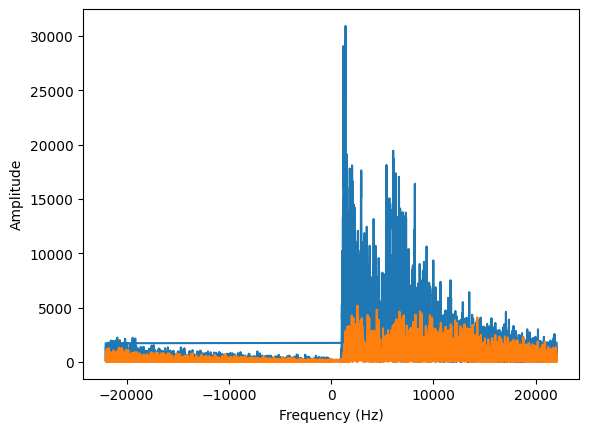

In [ ]:
import numpy as np
from scipy.io import wavfile

# Load audio file
sample_rate, audio_data = wavfile.read("/content/drive/MyDrive/Data/sliced_28.35.wav")

# Apply FFT
fft_output = np.fft.fft(audio_data)

# Get frequencies
frequencies = np.fft.fftfreq(len(audio_data), 1/sample_rate)
print(frequencies)
# Plot FFT output (optional)
import matplotlib.pyplot as plt
plt.plot(frequencies, np.abs(fft_output))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
len(frequencies)

14075

In [ ]:
frequencies.shape

(14075,)

In [ ]:
def extract_fft_features(audio_file):
    sample_rate, audio_data = wavfile.read(audio_file)
    fft_output = np.fft.fft(audio_data)
    return np.abs(fft_output)
x = extract_fft_features("/content/drive/MyDrive/Data/sliced_28.296.wav")
x.shape

(14074, 2)

# Test with real songs

In [ ]:
def slice_and_display_audio(file_path, start_time):
    audio_data, sampling_rate = librosa.load(file_path, sr=None)
    segment_duration = 30/118
    num_segments = int(len(audio_data) / sampling_rate / segment_duration)
    for i in range(80):
        segment_start = i * segment_duration + start_time
        segment_end = segment_start + segment_duration
        segment_start_sample = int(segment_start * sampling_rate)
        segment_end_sample = int(segment_end * sampling_rate)
        segment_data = audio_data[segment_start_sample:segment_end_sample]
        print(f"Segment {i+1}: {segment_start} s - {segment_end} s")
        display(ipd.Audio(segment_data, rate=sampling_rate))

start_time = 1.13
file_path = "/content/drive/MyDrive/Data/song5.wav"

slice_and_display_audio(file_path, start_time)

Segment 1: 1.13 s - 1.384237288135593 s


Segment 2: 1.384237288135593 s - 1.6384745762711863 s


Segment 3: 1.6384745762711863 s - 1.8927118644067795 s


Segment 4: 1.8927118644067795 s - 2.1469491525423727 s


Segment 5: 2.1469491525423727 s - 2.401186440677966 s


Segment 6: 2.401186440677966 s - 2.6554237288135596 s


Segment 7: 2.655423728813559 s - 2.909661016949152 s


Segment 8: 2.909661016949152 s - 3.1638983050847456 s


Segment 9: 3.1638983050847456 s - 3.418135593220339 s


Segment 10: 3.418135593220339 s - 3.6723728813559324 s


Segment 11: 3.672372881355932 s - 3.926610169491525 s


Segment 12: 3.926610169491525 s - 4.180847457627118 s


Segment 13: 4.180847457627118 s - 4.435084745762712 s


Segment 14: 4.435084745762712 s - 4.689322033898305 s


Segment 15: 4.689322033898305 s - 4.943559322033899 s


Segment 16: 4.943559322033898 s - 5.197796610169491 s


Segment 17: 5.197796610169491 s - 5.452033898305085 s


Segment 18: 5.452033898305085 s - 5.706271186440678 s


Segment 19: 5.706271186440678 s - 5.9605084745762715 s


Segment 20: 5.960508474576271 s - 6.214745762711864 s


Segment 21: 6.214745762711864 s - 6.4689830508474575 s


Segment 22: 6.4689830508474575 s - 6.723220338983051 s


Segment 23: 6.72322033898305 s - 6.9774576271186435 s


Segment 24: 6.9774576271186435 s - 7.231694915254237 s


Segment 25: 7.231694915254237 s - 7.48593220338983 s


Segment 26: 7.48593220338983 s - 7.740169491525424 s


Segment 27: 7.740169491525424 s - 7.994406779661017 s


Segment 28: 7.994406779661016 s - 8.24864406779661 s


Segment 29: 8.24864406779661 s - 8.502881355932203 s


Segment 30: 8.502881355932203 s - 8.757118644067797 s


Segment 31: 8.757118644067795 s - 9.011355932203388 s


Segment 32: 9.01135593220339 s - 9.265593220338983 s


Segment 33: 9.265593220338982 s - 9.519830508474575 s


Segment 34: 9.519830508474577 s - 9.77406779661017 s


Segment 35: 9.774067796610169 s - 10.028305084745762 s


Segment 36: 10.028305084745764 s - 10.282542372881357 s


Segment 37: 10.282542372881355 s - 10.536779661016949 s


Segment 38: 10.536779661016947 s - 10.79101694915254 s


Segment 39: 10.791016949152542 s - 11.045254237288136 s


Segment 40: 11.045254237288134 s - 11.299491525423727 s


Segment 41: 11.29949152542373 s - 11.553728813559323 s


Segment 42: 11.55372881355932 s - 11.807966101694914 s


Segment 43: 11.807966101694916 s - 12.06220338983051 s


Segment 44: 12.062203389830508 s - 12.316440677966101 s


Segment 45: 12.3164406779661 s - 12.570677966101693 s


Segment 46: 12.570677966101695 s - 12.824915254237288 s


Segment 47: 12.824915254237286 s - 13.07915254237288 s


Segment 48: 13.079152542372881 s - 13.333389830508475 s


Segment 49: 13.333389830508473 s - 13.587627118644066 s


Segment 50: 13.587627118644068 s - 13.841864406779662 s


Segment 51: 13.84186440677966 s - 14.096101694915253 s


Segment 52: 14.096101694915255 s - 14.350338983050849 s


Segment 53: 14.350338983050847 s - 14.60457627118644 s


Segment 54: 14.604576271186438 s - 14.858813559322032 s


Segment 55: 14.858813559322034 s - 15.113050847457627 s


Segment 56: 15.113050847457625 s - 15.367288135593219 s


Segment 57: 15.36728813559322 s - 15.621525423728814 s


Segment 58: 15.621525423728812 s - 15.875762711864406 s


Segment 59: 15.875762711864407 s - 16.13 s


Segment 60: 16.13 s - 16.38423728813559 s


Segment 61: 16.38423728813559 s - 16.638474576271182 s


Segment 62: 16.638474576271186 s - 16.892711864406778 s


Segment 63: 16.892711864406778 s - 17.14694915254237 s


Segment 64: 17.146949152542373 s - 17.401186440677964 s


Segment 65: 17.401186440677964 s - 17.655423728813556 s


Segment 66: 17.655423728813556 s - 17.909661016949148 s


Segment 67: 17.90966101694915 s - 18.163898305084743 s


Segment 68: 18.163898305084743 s - 18.418135593220335 s


Segment 69: 18.418135593220338 s - 18.67237288135593 s


Segment 70: 18.67237288135593 s - 18.92661016949152 s


Segment 71: 18.926610169491525 s - 19.180847457627117 s


Segment 72: 19.180847457627117 s - 19.43508474576271 s


Segment 73: 19.435084745762712 s - 19.689322033898303 s


Segment 74: 19.689322033898303 s - 19.943559322033895 s


Segment 75: 19.943559322033895 s - 20.197796610169487 s


Segment 76: 20.19779661016949 s - 20.452033898305082 s


Segment 77: 20.452033898305082 s - 20.706271186440674 s


Segment 78: 20.706271186440677 s - 20.96050847457627 s


Segment 79: 20.96050847457627 s - 21.21474576271186 s


Segment 80: 21.214745762711864 s - 21.468983050847456 s


In [ ]:
#end at segment 224

In [ ]:
list_file = list(range(1, 174))
print(list_file)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173]


In [ ]:

def slice_and_export_audio(file_path, list_file):

    audio_data, sampling_rate = sf.read(file_path)


    segment_duration = 30/64


    num_segments = int(len(audio_data) / sampling_rate / segment_duration)


    for i in list_file:
        if i <= num_segments:
            segment_start = (i - 1) * segment_duration + 5.65
            segment_end = segment_start + segment_duration
            segment_start_sample = int(segment_start * sampling_rate)
            segment_end_sample = int(segment_end * sampling_rate)
            segment_data = audio_data[segment_start_sample:segment_end_sample]

            segment_file_name = f"sliced_song.{i}.wav"
            segment_file_path = os.path.join("/content/drive/MyDrive/Data/song4/song4_audio", segment_file_name)
            sf.write(segment_file_path, segment_data, sampling_rate)
            print(f"Segment {i} exported as {segment_file_name}")

file_path = "/content/drive/MyDrive/Data/song4.wav"

slice_and_export_audio(file_path, list_file)


Segment 1 exported as sliced_song.1.wav
Segment 2 exported as sliced_song.2.wav
Segment 3 exported as sliced_song.3.wav
Segment 4 exported as sliced_song.4.wav
Segment 5 exported as sliced_song.5.wav
Segment 6 exported as sliced_song.6.wav
Segment 7 exported as sliced_song.7.wav
Segment 8 exported as sliced_song.8.wav
Segment 9 exported as sliced_song.9.wav
Segment 10 exported as sliced_song.10.wav
Segment 11 exported as sliced_song.11.wav
Segment 12 exported as sliced_song.12.wav
Segment 13 exported as sliced_song.13.wav
Segment 14 exported as sliced_song.14.wav
Segment 15 exported as sliced_song.15.wav
Segment 16 exported as sliced_song.16.wav
Segment 17 exported as sliced_song.17.wav
Segment 18 exported as sliced_song.18.wav
Segment 19 exported as sliced_song.19.wav
Segment 20 exported as sliced_song.20.wav
Segment 21 exported as sliced_song.21.wav
Segment 22 exported as sliced_song.22.wav
Segment 23 exported as sliced_song.23.wav
Segment 24 exported as sliced_song.24.wav
Segment 25

In [ ]:

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)  # Pass y and sr as keyword arguments
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    files = os.listdir(input_path)

    for file in files:
        if file.endswith('.wav'):
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.wav', '.png'))
            create_spectrogram(input_file, output_file)

create_pngs_from_wavs('/content/drive/MyDrive/Data/song4/song4_audio', '/content/drive/MyDrive/Data/song4/song4_spec')



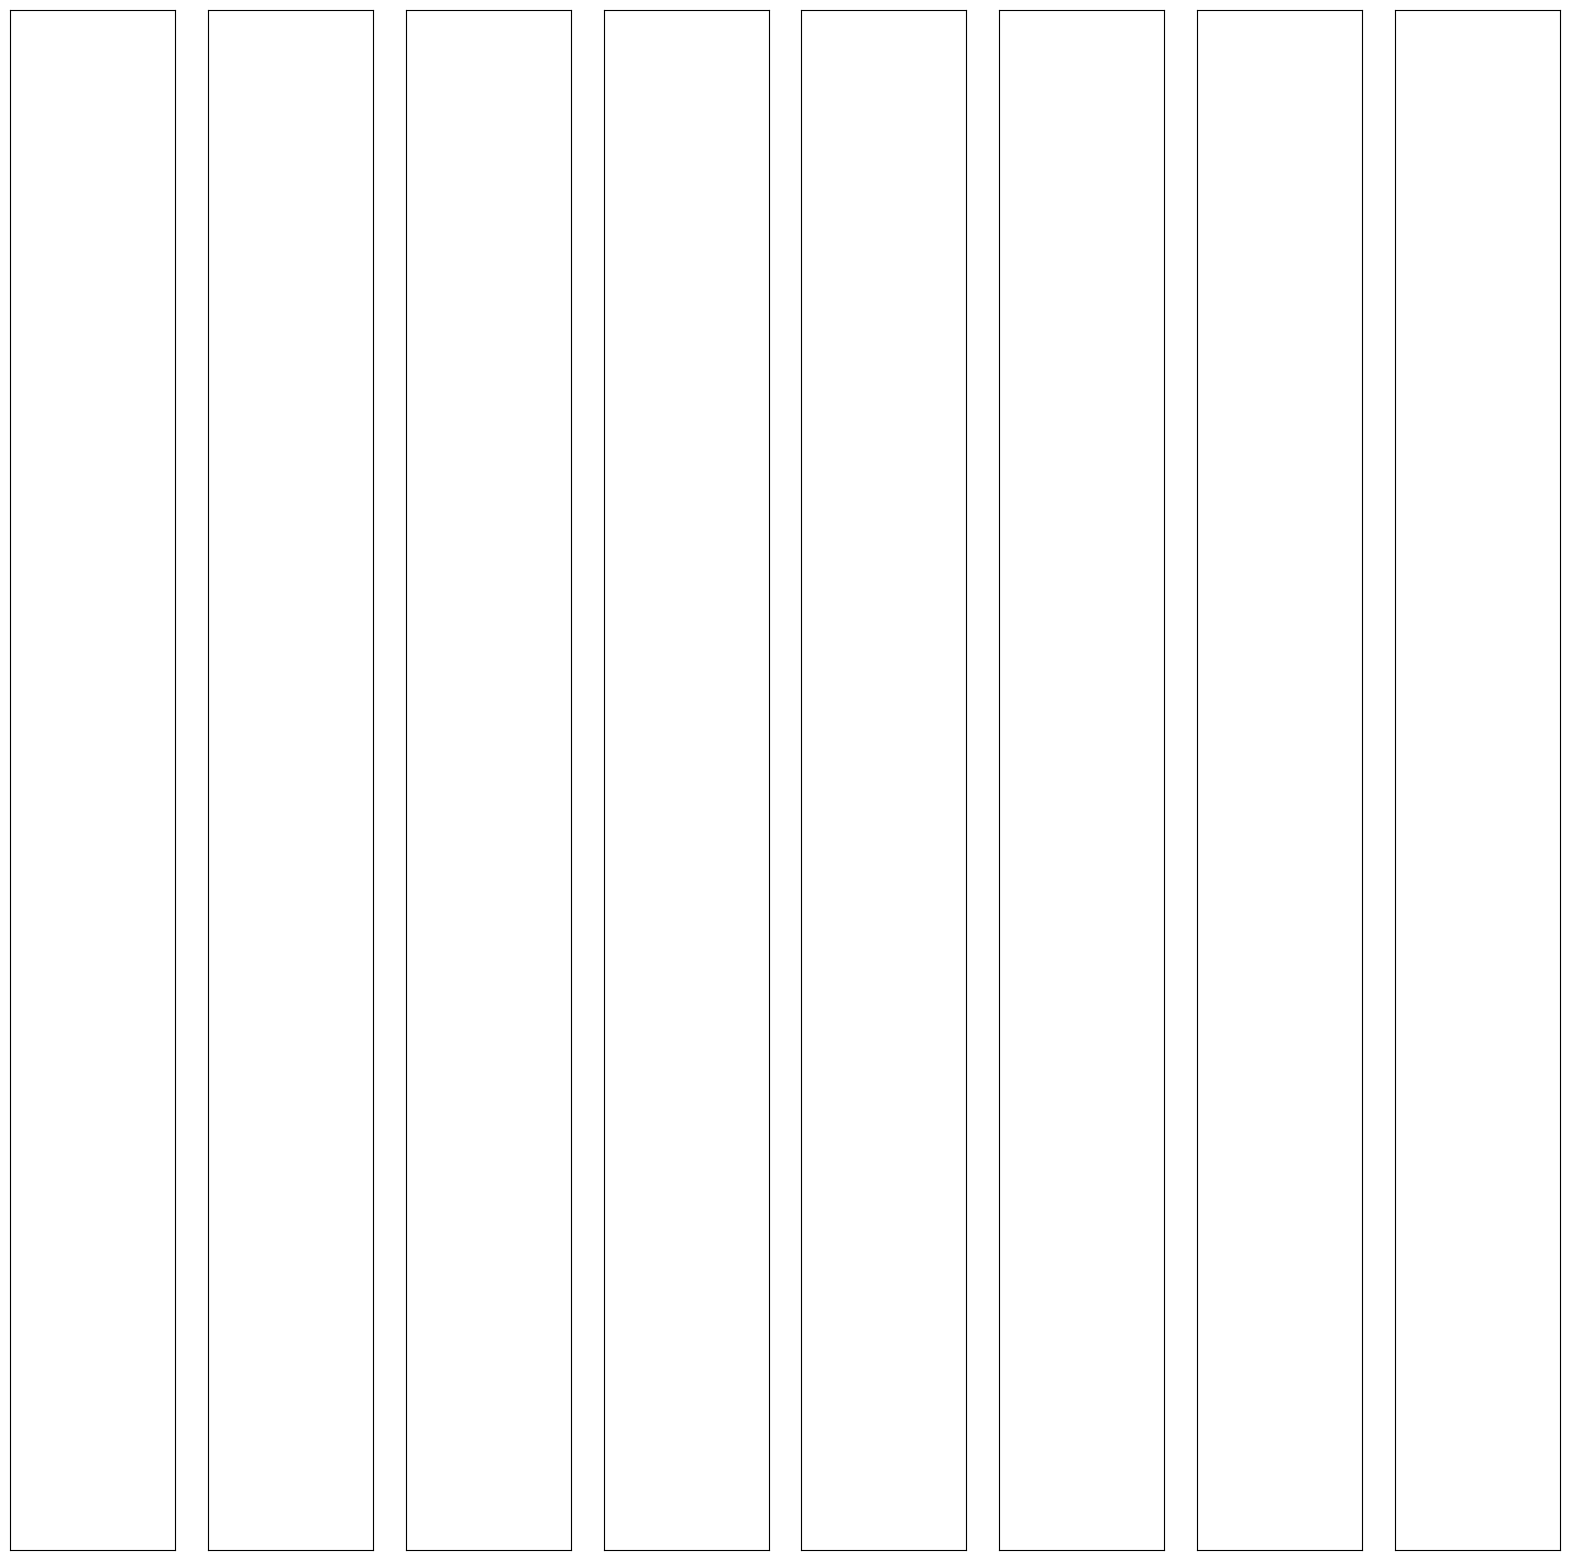

In [ ]:

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})


x_prediction = []
y_prediction = []

images, labels = load_images_from_path('/content/drive/MyDrive/Data/song/song_spec', 1)
show_images(images)

x_prediction += images



In [ ]:
len(x_prediction)

224

In [ ]:
 for i in range(0,len(x_prediction)):
  x_prediction[i] = np.expand_dims(x_prediction[i], axis=0)

In [ ]:
from keras.models import load_model


model_path = '/content/drive/MyDrive/Data/HH_model'
loaded_model = load_model(model_path)
hh_list=[]
for i in range(0,len(x_prediction)):
  prediction = loaded_model.predict(x_prediction[i])
  class_label = 1 if prediction[0][1] >= 0.5 else 0
  hh_list.append(class_label)


print(hh_list)


1/1 [==============================] - 0s 55ms/step
[0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]


In [ ]:
from keras.models import load_model


model_snare_path = '/content/drive/MyDrive/Data/SD_model'
loaded_model = load_model(model_snare_path)
snare_list=[]
for i in range(0,len(x_prediction)):
  prediction = loaded_model.predict(x_prediction[i])
  class_label = 1 if prediction[0][1] >= 0.5 else 0
  snare_list.append(class_label)

print(snare_list)






1/1 [==============================] - 0s 52ms/step
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]


In [ ]:
from keras.models import load_model


model_kick_path = '/content/drive/MyDrive/Data/KD_model'
loaded_model = load_model(model_kick_path)
kick_list=[]
for i in range(0,len(x_prediction)):
  prediction = loaded_model.predict(x_prediction[i])
  class_label = 1 if prediction[0][1] >= 0.5 else 0
  kick_list.append(class_label)


print(kick_list)


1/1 [==============================] - 0s 84ms/step
[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]


In [ ]:
from keras.models import load_model


model_tom_path = '/content/drive/MyDrive/Data/Tom_model'
loaded_model = load_model(model_tom_path)
tom_list=[]
for i in range(0,len(x_prediction)):
  prediction = loaded_model.predict(x_prediction[i])
  class_label = 1 if prediction[0][1] >= 0.5 else 0
  tom_list.append(class_label)


print(tom_list)


1/1 [==============================] - 0s 64ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from keras.models import load_model


model_tom_path = '/content/drive/MyDrive/Data/Crash_model'
loaded_model = load_model(model_tom_path)
crash_list=[]
for i in range(0,len(x_prediction)):
  prediction = loaded_model.predict(x_prediction[i])
  class_label = 1 if prediction[0][1] >= 0.5 else 0
  crash_list.append(class_label)


print(crash_list)


1/1 [==============================] - 0s 49ms/step
[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
print(hh_list)
print(snare_list)
print(kick_list)
print(tom_list)
print(crash_list)
print(len(hh_list))

[0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
for i in range(0,224):
  if(snare_list[i]==1):
    hh_list[i]=1
print(hh_list)

[0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0
 1 1]


In [ ]:
hh_list_actual = []
while(len(hh_list_actual)<224):
  hh_list_actual.append(1)
for i in [0,32,48,112,152,184,200]:
  hh_list_actual[i] = 0
print(hh_list_actual)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming hh_list_actual and hh_list are your actual and predicted lists respectively
# Convert lists to arrays if they are not already arrays
hh_list_actual = np.array(hh_list_actual)
hh_list = np.array(hh_list)

# Compute confusion matrix
conf_matrix = confusion_matrix(hh_list_actual, hh_list)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  7   0]
 [115 102]]


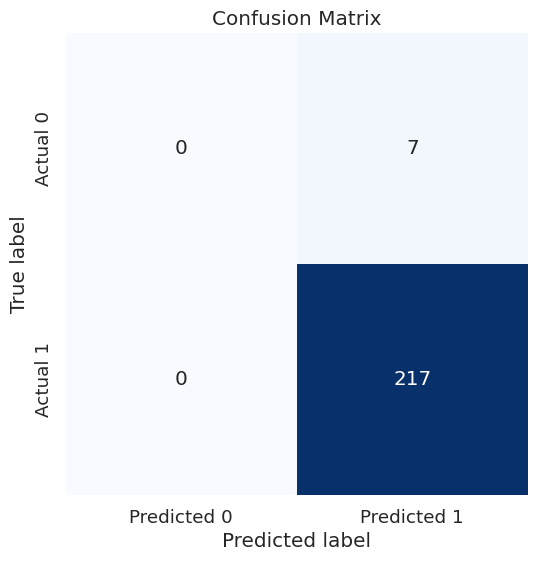

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming hh_list_actual and hh_list are your actual and predicted lists respectively
# Convert lists to arrays if they are not already arrays
hh_list_actual = np.array(hh_list_actual)
hh_list = np.array(hh_list)

# Compute confusion matrix
conf_matrix = confusion_matrix(hh_list_actual, hh_list)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
for i in range(0,28):
  if hh_list[8*i] + hh_list[8*i+1] + hh_list[8*i+2] + hh_list[8*i+3] + hh_list[8*i+4] + hh_list[8*i+5] + hh_list[8*i+6] + hh_list[8*i+7] >0:
    hh_list[8*i]=1
    hh_list[8*i+1]=1
    hh_list[8*i+2]=1
    hh_list[8*i+3]=1
    hh_list[8*i+4]=1
    hh_list[8*i+5]=1
    hh_list[8*i+6]=1
    hh_list[8*i+7]=1

In [ ]:
snare_list_actual = []
for i in range(0,28):
  snare_list_actual.append(0)
  snare_list_actual.append(0)
  snare_list_actual.append(1)
  snare_list_actual.append(0)
  snare_list_actual.append(0)
  snare_list_actual.append(0)
  snare_list_actual.append(1)
  snare_list_actual.append(0)
snare_list_actual[183]=1

In [ ]:
print(len(snare_list_actual))

224


In [ ]:
kick_list_actual = []
for i in range(0,28):
  kick_list_actual.append(1)
  kick_list_actual.append(0)
  kick_list_actual.append(0)
  kick_list_actual.append(0)
  kick_list_actual.append(1)
  kick_list_actual.append(1)
  kick_list_actual.append(0)
  kick_list_actual.append(0)
kick_list_actual[223]=1
print(kick_list_actual)

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]


In [ ]:
tom_list_actual = []
while(len(tom_list_actual)<224):
  tom_list_actual.append(0)

In [ ]:
crash_list_actual=[]
while(len(crash_list_actual)<224):
  crash_list_actual.append(0)
for i in [0,32,48,112,152,184,200]:
  crash_list_actual[i] = 1

In [ ]:
print(hh_list_actual)
print(snare_list_actual)
print(kick_list_actual)
print(tom_list_actual)
print(crash_list_actual)
print(len(hh_list_actual))


[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
hh_correct = 0
for i in range(0,224):
  if(hh_list[i]==hh_list_actual[i]):
    hh_correct += 1
print(hh_correct/224)

0.7410714285714286


In [ ]:
snare_correct = 0
for i in range(0,224):
  if(snare_list[i]==snare_list_actual[i]):
    snare_correct += 1
print(snare_correct/224)

1.0


In [ ]:
kick_correct = 0
for i in range(0,224):
  if(kick_list[i]==kick_list_actual[i]):
    kick_correct += 1
print(kick_correct/224)

0.9732142857142857


In [ ]:
tom_correct = 0
for i in range(0,224):
  if(tom_list[i]==tom_list_actual[i]):
    tom_correct += 1
print(tom_correct/224)

0.9910714285714286


In [ ]:
crash_correct = 0
for i in range(0,224):
  if(crash_list[i]==crash_list_actual[i]):
    crash_correct += 1
print(crash_correct/224)

0.9419642857142857


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def compute_metrics(predicted, actual):
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    return precision, recall, f1

# Example lists
hihat_list = [0, 1, 0, 1, 0, 1, 1]
hihat_list_actual = [0, 1, 0, 0, 1, 1, 1]

precision, recall, f1 = compute_metrics(hihat_list, hihat_list_actual)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def compute_metrics(predicted, actual):
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    return precision, recall, f1, accuracy


precision, recall, f1, accuracy = compute_metrics(hh_list, hh_list_actual)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 1.0
Recall: 0.7327188940092166
F1 Score: 0.8457446808510639
Accuracy: 0.7410714285714286


In [ ]:

precision, recall, f1, accuracy = compute_metrics(snare_list, snare_list_actual)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0


In [ ]:

precision, recall, f1, accuracy = compute_metrics(kick_list, kick_list_actual)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.9340659340659341
Recall: 1.0
F1 Score: 0.9659090909090909
Accuracy: 0.9732142857142857


In [ ]:
print(tom_list)
print(tom_list_actual)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:

precision, recall, f1, accuracy = compute_metrics(tom_list, tom_list_actual)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.9910714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

precision, recall, f1, accuracy = compute_metrics(crash_list, crash_list_actual)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.3333333333333333
Recall: 0.8571428571428571
F1 Score: 0.48
Accuracy: 0.9419642857142857


# Compare Result

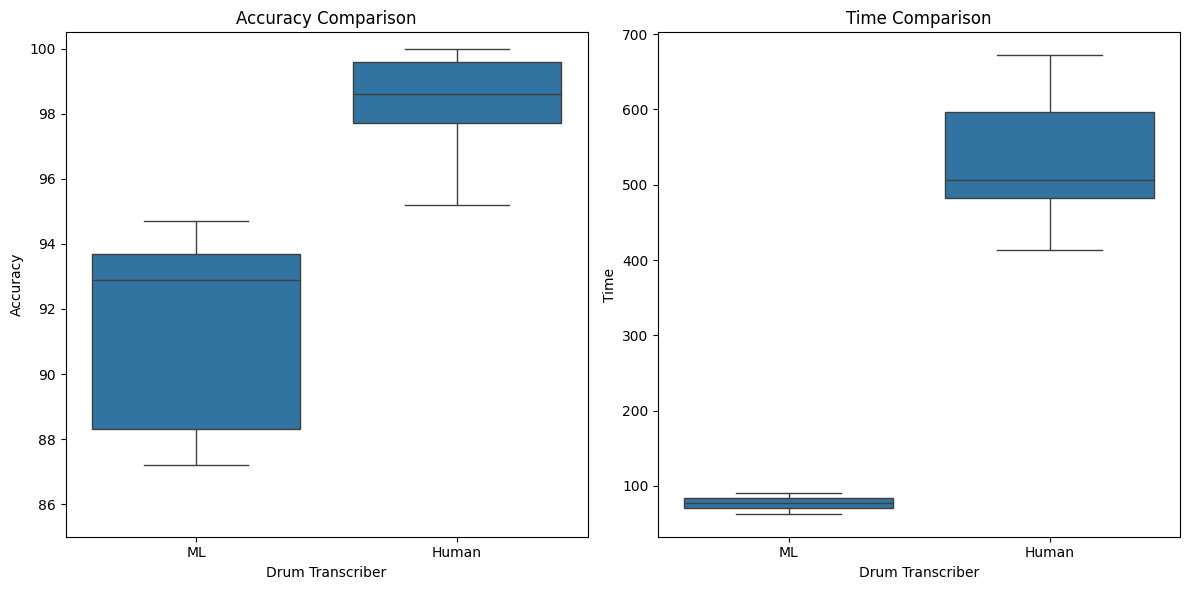

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {
    'Accuracy': [92.9,88.3,93.7,94.7,87.2,99.6,98.6,100,97.7,95.2],
    'Time': [77,63,84,71,90,597,506,482,413,672],
    'Drum Transcriber': ['ML', 'ML', 'ML', 'ML', 'ML', 'Human', 'Human', 'Human', 'Human', 'Human']
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
box1 = sns.boxplot(x='Drum Transcriber', y='Accuracy', data=df)
plt.ylim(85,100.5)
plt.title('Accuracy Comparison')



plt.subplot(1, 2, 2)
box2 = sns.boxplot(x='Drum Transcriber', y='Time', data=df)
plt.title('Time Comparison')


plt.tight_layout()
plt.show()


<ipython-input-15-34e32c421024>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box1 = sns.boxplot(x='Type', y='Accuracy', data=df, palette="colorblind")


Text(0.5, 1.0, 'Accuracy Comparison')

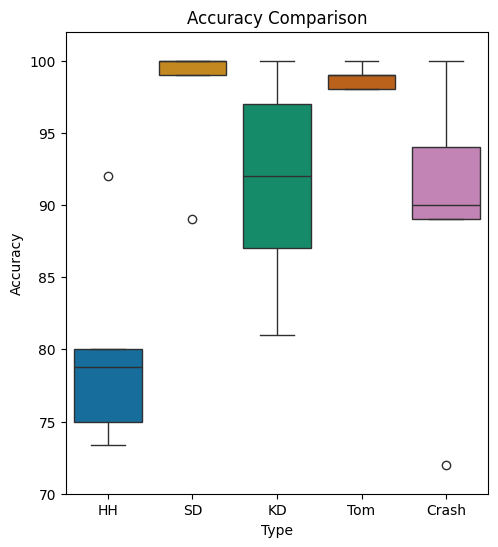

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {
    'Accuracy': [73.4,78.8,80,92,75,100,99,100,100,89,97,92,100,87,81,99,98,99,98,100,94,72,89,100,90],
    'Type': ['HH','HH','HH','HH','HH','SD','SD','SD','SD','SD','KD','KD','KD','KD','KD','Tom','Tom','Tom','Tom','Tom','Crash','Crash','Crash','Crash','Crash']
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
box1 = sns.boxplot(x='Type', y='Accuracy', data=df, palette="colorblind")
plt.ylim(70,102)
plt.title('Accuracy Comparison')

<ipython-input-19-6e5817e32209>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box1 = sns.boxplot(x='Type', y='Accuracy', data=df, palette="colorblind")


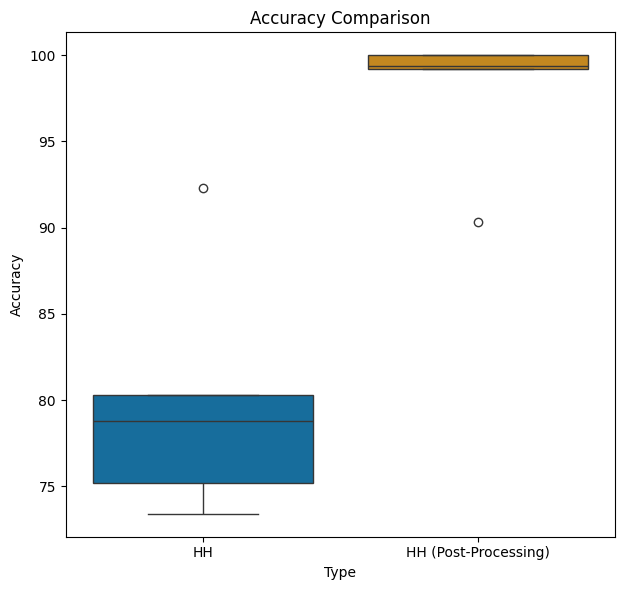

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Accuracy': [73.4,78.8,80.3,75.2,92.3,100,99.4,99.2,90.3,100],

    'Type': ['HH','HH','HH','HH','HH','HH (Post-Processing)','HH (Post-Processing)','HH (Post-Processing)','HH (Post-Processing)','HH (Post-Processing)']}
df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
box1 = sns.boxplot(x='Type', y='Accuracy', data=df, palette="colorblind")
plt.ylim=(70,100.5)
plt.title('Accuracy Comparison')

plt.tight_layout()
plt.show()


<ipython-input-16-0ed384a965b3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box1 = sns.boxplot(x='Drum Transcriber', y='Accuracy', data=df, palette="colorblind")


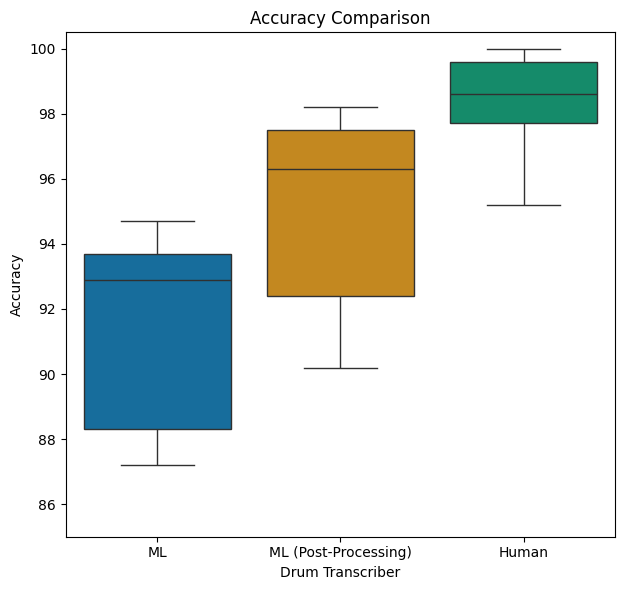

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Accuracy': [92.9,88.3,93.7,94.7,87.2,98.2,92.4,97.5,96.3,90.2,99.6,98.6,100,97.7,95.2],

    'Drum Transcriber': ['ML','ML','ML','ML','ML','ML (Post-Processing)', 'ML (Post-Processing)', 'ML (Post-Processing)', 'ML (Post-Processing)', 'ML (Post-Processing)', 'Human', 'Human', 'Human', 'Human', 'Human']
}
df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
box1 = sns.boxplot(x='Drum Transcriber', y='Accuracy', data=df, palette="colorblind")
plt.ylim(85,100.5)
plt.title('Accuracy Comparison')

plt.tight_layout()
plt.show()


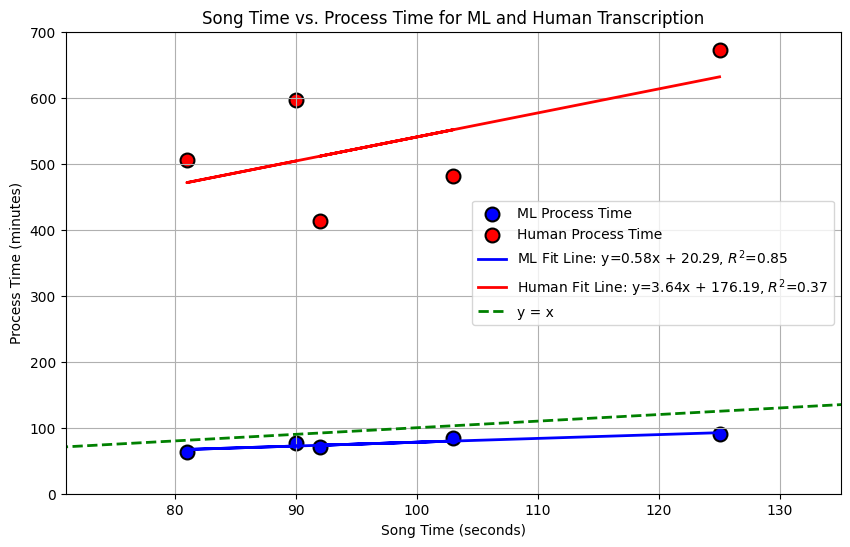

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

data = {
    'Song': ['Song 1', 'Song 2', 'Song 3', 'Song 4', 'Song 5'],
    'Song_Time': [90,81,103,92,125],
    'ML_Process_Time': [77,63,84,71,90],
    'Human_Process_Time': [597,506,482,413,672]
}

df = pd.DataFrame(data)

slope_ml, intercept_ml, r_value_ml, p_value_ml, std_err_ml = linregress(df['Song_Time'], df['ML_Process_Time'])
regression_line_ml = slope_ml * df['Song_Time'] + intercept_ml

slope_human, intercept_human, r_value_human, p_value_human, std_err_human = linregress(df['Song_Time'], df['Human_Process_Time'])
regression_line_human = slope_human * df['Song_Time'] + intercept_human

plt.figure(figsize=(10, 6))

plt.scatter(df['Song_Time'], df['ML_Process_Time'], color='blue', label='ML Process Time', s=100, edgecolors='black', linewidth=1.5)

plt.scatter(df['Song_Time'], df['Human_Process_Time'], color='red', label='Human Process Time', s=100, edgecolors='black', linewidth=1.5)

plt.plot(df['Song_Time'], regression_line_ml, color='blue', linestyle='-', linewidth=2,
         label=f'ML Fit Line: y={slope_ml:.2f}x + {intercept_ml:.2f}, $R^2$={r_value_ml**2:.2f}')

plt.plot(df['Song_Time'], regression_line_human, color='red', linestyle='-', linewidth=2,
         label=f'Human Fit Line: y={slope_human:.2f}x + {intercept_human:.2f}, $R^2$={r_value_human**2:.2f}')

max_value = max(df['Song_Time'].max(), df['Human_Process_Time'].max(), df['ML_Process_Time'].max())
plt.plot([0, max_value], [0, max_value], color='green', linestyle='--', linewidth=2, label='y = x')
plt.xlabel('Song Time (seconds)')
plt.ylabel('Process Time (minutes)')
plt.title('Song Time vs. Process Time for ML and Human Transcription')
plt.legend()
plt.grid(True)

plt.ylim(0, 700)
plt.xlim(min(df['Song_Time']) - 10, max(df['Song_Time']) + 10)  # Adding some padding around the min and max song time values

plt.show()

# Deployment

In [ ]:
pip install gradio

In [ ]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from PIL import Image
from keras.models import load_model

def transcribe(audio_file):
    x_prediction = []

    def create_spectrogram(audio_segment):
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(1, 1, 1)
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

        ms = librosa.feature.melspectrogram(y=audio_segment, sr=sampling_rate)
        log_ms = librosa.power_to_db(ms, ref=np.max)
        librosa.display.specshow(log_ms, sr=sampling_rate, ax=ax)
        plt.axis('off')

        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        plt.close(fig)

        img = Image.fromarray(img)
        img = img.resize((224, 224))

        img_array = np.array(img)

        return img_array

    try:
        audio_data, sampling_rate = librosa.load(audio_file, sr=None)
    except Exception as e:
        return f"Error loading audio file: {e}"

    segment_duration = 30 / 100  # 0.3 seconds
    start_time = 0
    for i in range(8):
        segment_start = i * segment_duration + start_time
        segment_end = segment_start + segment_duration
        segment_start_sample = int(segment_start * sampling_rate)
        segment_end_sample = int(segment_end * sampling_rate)
        segment_data = audio_data[segment_start_sample:segment_end_sample]
        x_prediction.append(create_spectrogram(segment_data))

    for i in range(len(x_prediction)):
        x_prediction[i] = np.expand_dims(x_prediction[i], axis=0)

    model_paths = {
        "HH_model": "/content/drive/MyDrive/Data/HH_model",
        "SD_model": "/content/drive/MyDrive/Data/SD_model",
        "KD_model": "/content/drive/MyDrive/Data/KD_model"
    }

    predictions = {"HH": [], "SD": [], "KD": []}

    for model_name, model_path in model_paths.items():
        try:
            loaded_model = load_model(model_path)
        except Exception as e:
            return f"Error loading {model_name}: {e}"

        for i in range(len(x_prediction)):
            try:
                prediction = loaded_model.predict(x_prediction[i])
                class_label = 1 if prediction[0][0] >= 0.5 else 0
                predictions[model_name.split('_')[0]].append(class_label)
            except Exception as e:
                return f"Error predicting with {model_name}: {e}"

    # Transforming predictions
    for key, value in predictions.items():
        if key == "HH":
            predictions[key] = ['-' if v == 1 else 'x' for v in value]
        else:
            predictions[key] = ['-' if v == 1 else 'o' for v in value]

    result_string = "Predictions:\n"
    for key, value in predictions.items():
        result_string += f"{key}: {''.join(value)}\n"

    return result_string

iface = gr.Interface(fn=transcribe,
                     inputs=gr.Audio(label="Audio File", type="filepath"),
                     outputs=gr.Textbox(label="Output"))

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a855be102c0a1e08d7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import os
import random
import shutil

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define paths
source_dir = "/content/drive/MyDrive/Data/HH_class"
train_dir = "/content/drive/MyDrive/Data/HH/HH_train"
val_dir = "/content/drive/MyDrive/Data/HH/HH_valid"
test_dir = "/content/drive/MyDrive/Data/HH/HH_test"

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the ratio for splitting
train_ratio = 0.75
val_ratio = 0.05
test_ratio = 0.2

# Iterate through each class folder
for class_folder in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_folder)
    if os.path.isdir(class_path):
        class_files = os.listdir(class_path)
        random.shuffle(class_files)

        # Calculate the number of files for each set
        num_train = int(len(class_files) * train_ratio)
        num_val = int(len(class_files) * val_ratio)
        num_test = len(class_files) - num_train - num_val

        # Split the files into train, validation, and test sets
        train_files = class_files[:num_train]
        val_files = class_files[num_train:num_train+num_val]
        test_files = class_files[num_train+num_val:]

        # Move files to respective directories
        for file_name in train_files:
            src = os.path.join(class_path, file_name)
            dst = os.path.join(train_dir, class_folder)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)

        for file_name in val_files:
            src = os.path.join(class_path, file_name)
            dst = os.path.join(val_dir, class_folder)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)

        for file_name in test_files:
            src = os.path.join(class_path, file_name)
            dst = os.path.join(test_dir, class_folder)
            os.makedirs(dst, exist_ok=True)
            shutil.copy(src, dst)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/drive/MyDrive/Data/HH/HH_train",

  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 620 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/drive/MyDrive/Data/HH/HH_valid",

  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['HH_0_spectro', 'HH_1_spectro']


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=15
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
20/20 [==============================] - 163s 7s/step - loss: 1.2055 - accuracy: 0.6806 - val_loss: 0.2423 - val_accuracy: 0.8500
Epoch 2/15
20/20 [==============================] - 129s 6s/step - loss: 0.3454 - accuracy: 0.8306 - val_loss: 0.2888 - val_accuracy: 0.8750
Epoch 3/15
20/20 [==============================] - 123s 6s/step - loss: 0.2414 - accuracy: 0.8935 - val_loss: 0.2486 - val_accuracy: 0.9250
Epoch 4/15
20/20 [==============================] - 126s 6s/step - loss: 0.2005 - accuracy: 0.9177 - val_loss: 0.3065 - val_accuracy: 0.8500
Epoch 5/15
20/20 [==============================] - 118s 6s/step - loss: 0.1691 - accuracy: 0.9226 - val_loss: 0.2660 - val_accuracy: 0.8250
Epoch 6/15
20/20 [==============================] - 123s 6s/step - loss: 0.1506 - accuracy: 0.9274 - val_loss: 0.2000 - val_accuracy: 0.9500
Epoch 7/15
20/20 [==============================] - 127s 6s/step - loss: 0.1456 - accuracy: 0.9452 - val_loss: 0.2317 - val_accuracy: 0.9250
Epoch 8/15
20

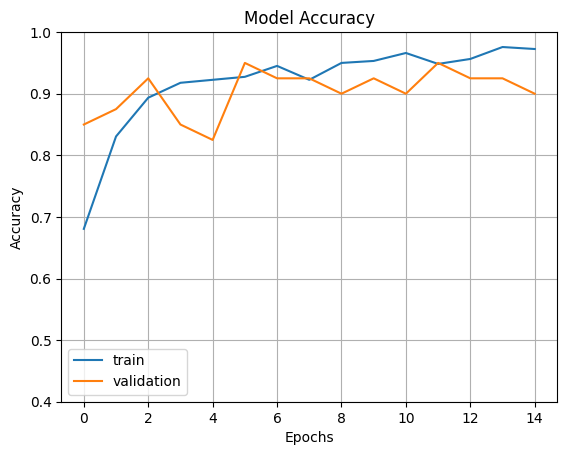

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

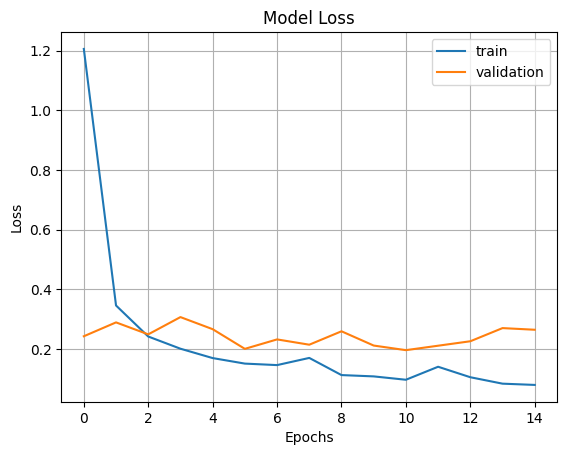

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x_test = []
y_test = []

images, labels = load_images_from_path('/content/drive/MyDrive/Data/HH/HH_test/HH_0_spectro', 0)

x_test += images
y_test += labels

images, labels = load_images_from_path('/content/drive/MyDrive/Data/HH/HH_test/HH_1_spectro', 1)


x_test += images
y_test += labels



In [ ]:
x_test[0].shape

(224, 224, 3)

In [ ]:
 for i in range(0,len(x_test)):
  x_test[i] = np.expand_dims(x_test[i], axis=0)

In [ ]:
y_predict=[]
for i in range(len(x_test)):
  pred=resnet_model.predict(x_test[i])
  output_class=class_names[np.argmax(pred)]
  y_predict.append(output_class)

1/1 [==============================] - 0s 189ms/step


In [ ]:
print(y_predict)

['HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_1_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_1_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_1_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_0_spectro', 'HH_1_spectro', 'HH_0_spectro', 'HH_0_s

In [ ]:
for i in range(len(y_predict)):
  if y_predict[i] == 'HH_0_spectro':
    y_predict[i]=0
  else:
    y_predict[i]=1

In [ ]:
print(y_predict)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
report = classification_report(y_test, y_predict)


print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       110
           1       0.89      0.88      0.88        57

    accuracy                           0.92       167
   macro avg       0.91      0.91      0.91       167
weighted avg       0.92      0.92      0.92       167



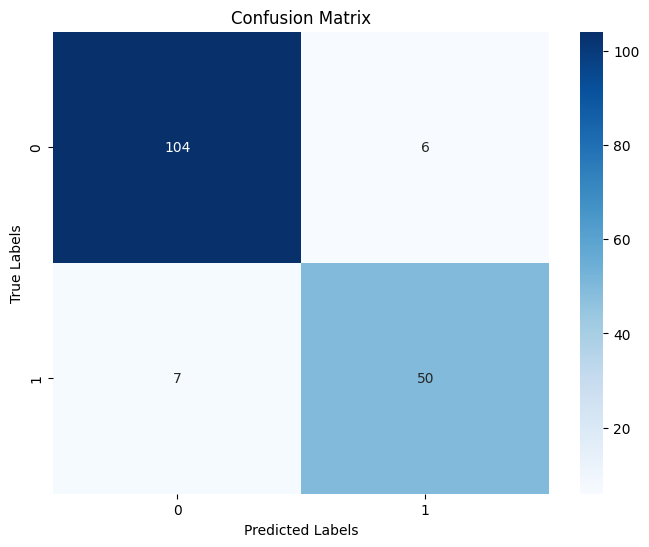

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load MobileNet with pre-trained ImageNet weights, without the top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_ds,
    epochs=15,  # Adjust the number of epochs as needed
    validation_data=val_ds
)


Epoch 1/15
20/20 [==============================] - 131s 6s/step - loss: 0.3675 - accuracy: 0.8500 - val_loss: 0.7720 - val_accuracy: 0.5000
Epoch 2/15
20/20 [==============================] - 118s 6s/step - loss: 0.1142 - accuracy: 0.9565 - val_loss: 0.5977 - val_accuracy: 0.6500
Epoch 3/15
20/20 [==============================] - 119s 6s/step - loss: 0.0636 - accuracy: 0.9806 - val_loss: 0.5473 - val_accuracy: 0.6750
Epoch 4/15
20/20 [==============================] - 117s 6s/step - loss: 0.0360 - accuracy: 0.9871 - val_loss: 0.3735 - val_accuracy: 0.8750
Epoch 5/15
20/20 [==============================] - 120s 6s/step - loss: 0.0257 - accuracy: 0.9903 - val_loss: 0.3031 - val_accuracy: 0.8750
Epoch 6/15
20/20 [==============================] - 117s 6s/step - loss: 0.0212 - accuracy: 0.9887 - val_loss: 0.2113 - val_accuracy: 0.9500
Epoch 7/15
20/20 [==============================] - 119s 6s/step - loss: 0.0318 - accuracy: 0.9935 - val_loss: 0.1942 - val_accuracy: 0.9500
Epoch 8/15
20

In [ ]:
y_predict=[]
for i in range(len(x_test)):
  pred=model.predict(x_test[i])
  output_class=class_names[np.argmax(pred)]
  y_predict.append(output_class)

1/1 [==============================] - 0s 53ms/step


In [ ]:
for i in range(len(y_predict)):
  if y_predict[i] == 'HH_0_spectro':
    y_predict[i]=0
  else:
    y_predict[i]=1

In [ ]:
report = classification_report(y_test, y_predict)


print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       110
           1       0.89      0.74      0.81        57

    accuracy                           0.88       167
   macro avg       0.88      0.85      0.86       167
weighted avg       0.88      0.88      0.88       167



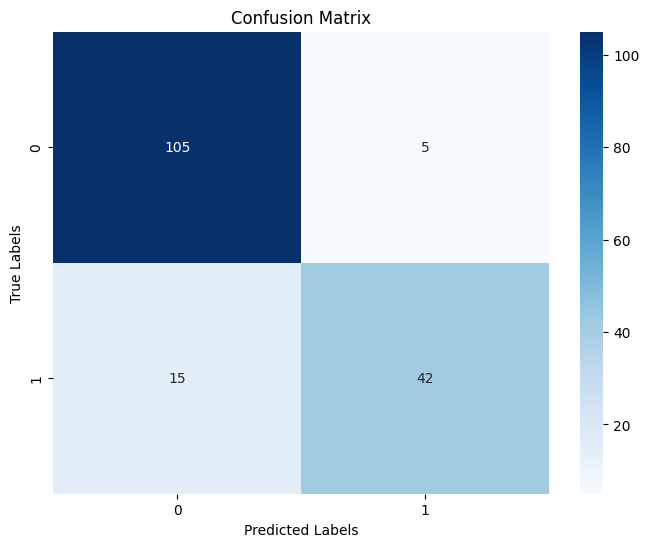

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()